In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement, nettoyage, jointure

## 1.1 Volaille

In [2]:
data = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/DisponibiliteAlimentaire_2017.csv")

In [3]:
data

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:

# Sélection des produits viande et des variables 
list_viande = ['Viande de Bovins', "Viande d'Ovins/Caprins", 'Viande de Suides', 'Viande de Volailles', 'Viande, Autre']
list_element = ['Production', 'Importations - Quantité', 'Exportations - Quantité', 'Disponibilité intérieure',
              'Disponibilité alimentaire (Kcal/personne/jour)']

viande = data.loc[(data['Produit'].isin(list_viande)) & (data['Élément'].isin(list_element)), 
                  ['Zone','Élément','Produit','Valeur']]

In [5]:
# Zoom sur les produits volaille
volaille = viande.loc[viande['Produit'] == 'Viande de Volailles', ['Zone','Élément','Valeur']]

In [6]:
# TCD avec index Zone pour le fichier viande
viande_total = viande.pivot_table(values=['Valeur'], index=["Zone"], columns=["Élément"], aggfunc=np.sum, margins=False)

In [7]:
viande_tot = viande_total.copy()
viande_tot.columns = viande_total.columns.droplevel(0)

In [8]:
viande_tot.reset_index(inplace=True)

In [9]:
# Conservons uniquement certaines variables
viande_tot1 = viande_tot.loc[:, ['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Importations - Quantité']]

In [10]:
viande_tot1.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": 
                            "Dispo alim tot (Kcal/personne/jour)", "Importations - Quantité": "Import tot - Quantité"}, inplace=True)

In [11]:
# TCD avec index Zone pour le fichier volaille
volaille1 = volaille.pivot_table(values=['Valeur'], index=["Zone"], columns=["Élément"], aggfunc=np.sum, margins=False)

In [12]:
volaille2 = volaille1.copy()
volaille2.columns = volaille1.columns.droplevel(0)
volaille2.reset_index(inplace=True)

In [13]:
# Gestion des valeurs manquantes
volaille2.isnull().sum()

Élément
Zone                                               0
Disponibilité alimentaire (Kcal/personne/jour)     0
Disponibilité intérieure                           2
Exportations - Quantité                           37
Importations - Quantité                            2
Production                                         4
dtype: int64

In [14]:
# Calcul manuel des exportations
volaille2.loc[volaille2['Exportations - Quantité'].isnull(),
              ['Exportations - Quantité']] = volaille2['Production'] + volaille2['Importations - Quantité'] - volaille2['Disponibilité intérieure']

In [15]:
volaille2.isnull().sum()

Élément
Zone                                              0
Disponibilité alimentaire (Kcal/personne/jour)    0
Disponibilité intérieure                          2
Exportations - Quantité                           4
Importations - Quantité                           2
Production                                        4
dtype: int64

In [16]:
# Suppression des pays pour lesquels des valeurs restent manquantes
volaille2.dropna(inplace=True)

In [17]:
# Jointure des fichiers viandes et volailles
volaille3 = pd.merge(volaille2,viande_tot1,on='Zone',how='inner')

In [18]:
volaille3

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Dispo alim tot (Kcal/personne/jour),Import tot - Quantité
0,Afghanistan,5.0,57.0,0.0,29.0,28.0,47.0,35.0
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,308.0,571.0
2,Albanie,85.0,47.0,0.0,38.0,13.0,263.0,51.0
3,Algérie,22.0,277.0,0.0,2.0,275.0,83.0,52.0
4,Allemagne,71.0,1739.0,646.0,842.0,1514.0,360.0,2671.0
...,...,...,...,...,...,...,...,...
163,Émirats arabes unis,147.0,412.0,94.0,433.0,48.0,247.0,611.0
164,Équateur,83.0,341.0,0.0,0.0,340.0,203.0,1.0
165,États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,21914.0,459.0,2337.0
166,Éthiopie,0.0,14.0,1.0,1.0,14.0,30.0,2.0


In [19]:
# Création de nouvelles variables : % de volaille sur le total viande
volaille3['% dispo alim tot viande'] = volaille3['Disponibilité alimentaire (Kcal/personne/jour)'] / volaille3['Dispo alim tot (Kcal/personne/jour)'] * 100 

In [20]:
volaille3['% Import tot viande'] = volaille3['Importations - Quantité'] / volaille3['Import tot - Quantité'] * 100 

In [21]:
volaille3.loc[volaille3['% Import tot viande'].isnull(),:]

Élément,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Dispo alim tot (Kcal/personne/jour),Import tot - Quantité,% dispo alim tot viande,% Import tot viande
23,Burkina Faso,8.0,46.0,0.0,0.0,46.0,63.0,0.0,12.698413,NaN
28,Cameroun,11.0,82.0,0.0,0.0,81.0,54.0,0.0,20.370370,NaN
88,Madagascar,14.0,82.0,-1.0,0.0,81.0,69.0,0.0,20.289855,NaN
90,Malawi,17.0,98.0,32.0,0.0,130.0,153.0,0.0,11.111111,NaN
104,Nigéria,2.0,202.0,0.0,0.0,201.0,34.0,0.0,5.882353,NaN
108,Népal,7.0,58.0,0.0,0.0,58.0,49.0,0.0,14.285714,NaN
110,Ouganda,5.0,66.0,0.0,0.0,65.0,64.0,0.0,7.812500,NaN
122,Rwanda,5.0,19.0,0.0,0.0,19.0,41.0,0.0,12.195122,NaN
127,République populaire démocratique de Corée,8.0,43.0,0.0,0.0,43.0,84.0,0.0,9.523810,NaN


In [22]:
volaille3.loc[volaille3['% Import tot viande'].isnull(),:] = 0

## 1.2 Population

In [23]:
data1 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/Population_2000_2018.csv")

In [24]:
data1

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [25]:
# Conservons uniquement les années 2007 et 2017
population = data1.loc[(data1['Année'] == 2007) | (data1['Année'] == 2017), ['Zone','Année','Valeur']]

In [26]:
population

,Zone,Année,Valeur
7,Afghanistan,2007,27100.536
17,Afghanistan,2017,36296.113
26,Afrique du Sud,2007,49119.759
36,Afrique du Sud,2017,57009.756
45,Albanie,2007,3033.998
...,...,...,...
4371,Yémen,2017,27834.819
4380,Zambie,2007,12502.958
4390,Zambie,2017,16853.599
4399,Zimbabwe,2007,12255.922


In [27]:
# TCD avec index Zone
pop = population.pivot_table(values=['Valeur'], index=["Zone"], columns=["Année"], aggfunc=np.sum, margins=False)

In [28]:
pop1 = pop.copy()
pop1.columns = pop.columns.droplevel(0)
pop1.reset_index(inplace=True)

In [29]:
# Gestion des valeurs manquantes
pop1.isnull().sum()

Année
Zone    0
2007    7
2017    1
dtype: int64

In [30]:
pop1.loc[pop1[2007].isnull(), :]

Année,Zone,2007,2017
26,"Bonaire, Saint-Eustache et Saba",NaN,25.401
52,Curaçao,NaN,161.997
169,Saint-Barthélemy,NaN,9.784
172,Saint-Martin (partie française),NaN,36.560
185,Sint Maarten (partie néerlandaise),NaN,41.444
189,Soudan,NaN,40813.397
191,Soudan du Sud,NaN,10910.763


In [31]:
# Suppression des pays pour lesquels une population est inconnue
pop1.dropna(inplace=True)

In [32]:
# Création d'une nouvelle variable : variation de population
pop1.rename(columns={2017: "pop 2017 (1000 pers)"}, inplace=True)

In [33]:
pop1['% Variation pop 2007-2017'] = (pop1["pop 2017 (1000 pers)"] - pop1[2007]) / pop1[2007] * 100

In [34]:
# Jointure des fichiers volaille et population
volaille_pop = pd.merge(volaille3,pop1,on='Zone',how='inner')

## 1.3 PIB

In [35]:
data2 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/PIB.csv")

In [36]:
pib = data2.pivot_table(values=['Valeur'], index=["Zone"], columns=["Élément"], aggfunc=np.sum, margins=False)

In [37]:
pib

,Valeur
Élément,Valeur
Zone,
Afghanistan,2058.4
Afrique du Sud,13860.3
Albanie,12771.0
Algérie,11737.4
Allemagne,53071.5
...,...
États-Unis d'Amérique,59914.8
Éthiopie,2021.6


In [38]:
pib1 = pib.copy()
pib1.columns = pib.columns.droplevel(0)
pib1.reset_index(inplace=True)

In [39]:
pib1.rename(columns={'Valeur': "PIB par habitant, ($ PPA internationaux"}, inplace=True)

In [40]:
volaille_pop_pib = pd.merge(volaille_pop,pib1,on='Zone',how='inner')

## 1.4 Volaille 2010

In [41]:
data3 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/bilan_2010.csv")

In [42]:
data3

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,28,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2010-),2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2010,2010,Milliers de tonnes,39,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,1478,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2010-),202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2010,2010,Milliers de tonnes,246,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Bilans Alimentaires (2010-),3,Albanie,5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,17,Im,Données de la FAO basées sur une méthodologie ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,FBS,Bilans Alimentaires (2010-),249,Yémen,5611,Importations - Quantité,2734,Viande de Volailles,2010,2010,Milliers de tonnes,104,Im,Données de la FAO basées sur une méthodologie ...
349,FBS,Bilans Alimentaires (2010-),251,Zambie,5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,43,Im,Données de la FAO basées sur une méthodologie ...
350,FBS,Bilans Alimentaires (2010-),251,Zambie,5611,Importations - Quantité,2734,Viande de Volailles,2010,2010,Milliers de tonnes,1,Im,Données de la FAO basées sur une méthodologie ...
351,FBS,Bilans Alimentaires (2010-),181,Zimbabwe,5511,Production,2734,Viande de Volailles,2010,2010,Milliers de tonnes,62,Im,Données de la FAO basées sur une méthodologie ...


In [43]:
volaille2010 = data3.pivot_table(values=['Valeur'], index=["Zone"], columns=["Élément"], aggfunc=np.sum, margins=False)

In [44]:
vol2010 = volaille2010.copy()
vol2010.columns = volaille2010.columns.droplevel(0)
vol2010.reset_index(inplace=True)

In [45]:
vol2010.rename(columns={'Importations - Quantité': "Importations 2010", 'Production' :'Production 2010'}, inplace=True)

In [46]:
vol2010.isnull().sum()

Élément
Zone                 0
Importations 2010    1
Production 2010      2
dtype: int64

In [47]:
vol2010.loc[(vol2010['Production 2010'].isnull()), :]

Élément,Zone,Importations 2010,Production 2010
45,Djibouti,1.0,NaN
95,Maldives,6.0,NaN


In [48]:
volaille_1 = pd.merge(volaille_pop_pib,vol2010,on='Zone',how='inner')

In [49]:
# Création de nouvelles variables : Variation des importations et de la production de volaille 2010-2017
volaille_1['% Variation prod volaille 2010-2017'] = (volaille_1["Production"] - volaille_1["Production 2010"]) / volaille_1["Production 2010"] * 100

In [50]:
volaille_1['% Variation import volaille 2010-2017'] = (volaille_1["Importations - Quantité"] - volaille_1["Importations 2010"]) / volaille_1["Importations 2010"] * 100

In [51]:
# Traitement des valeurs manquantes : = 0
volaille_1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [52]:
volaille_1.loc[volaille_1['% Variation prod volaille 2010-2017'].isnull(),'% Variation prod volaille 2010-2017'] = 0

In [53]:
volaille_1.loc[volaille_1['% Variation import volaille 2010-2017'].isnull(),'% Variation import volaille 2010-2017'] = 0

## 1.5 Représentation des poulets dans l'élevage local

In [54]:
data4 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/RepresentationPoulets.csv")

In [55]:
data4

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2007,2007,UGB/ha,0.00,Fc,Donnée calculée
1,EK,Tendances dans l’élevage,2,Afghanistan,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2017,2017,UGB/ha,0.00,Fc,Donnée calculée
2,EK,Tendances dans l’élevage,2,Afghanistan,7211,Part du total des animaux,1057,Poulets,2007,2007,% du total des UGB,1.66,Fc,Donnée calculée
3,EK,Tendances dans l’élevage,2,Afghanistan,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,2.04,Fc,Donnée calculée
4,EK,Tendances dans l’élevage,2,Afghanistan,5118,Réserves,1057,Poulets,2007,2007,Unités de gros bétail (UGB),90350.00,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,EK,Tendances dans l’élevage,181,Zimbabwe,7213,Densité des animaux dans la superficie agricole,1057,Poulets,2017,2017,UGB/ha,0.01,Fc,Donnée calculée
1167,EK,Tendances dans l’élevage,181,Zimbabwe,7211,Part du total des animaux,1057,Poulets,2007,2007,% du total des UGB,8.85,Fc,Donnée calculée
1168,EK,Tendances dans l’élevage,181,Zimbabwe,7211,Part du total des animaux,1057,Poulets,2017,2017,% du total des UGB,3.40,Fc,Donnée calculée
1169,EK,Tendances dans l’élevage,181,Zimbabwe,5118,Réserves,1057,Poulets,2007,2007,Unités de gros bétail (UGB),300000.00,Fc,Donnée calculée


In [56]:
poulet = data4.loc[data4['Année'] == 2017, ['Zone','Élément','Valeur']]

In [57]:
# Sélection des variables à étudier
poulet = poulet.loc[poulet['Élément'].isin(['Part du total des animaux','Réserves']), :]

In [58]:
poulet1 = poulet.pivot_table(values=['Valeur'], index=["Zone"], columns=["Élément"], aggfunc=np.sum, margins=False)

In [59]:
poulet2 = poulet1.copy()
poulet2.columns = poulet1.columns.droplevel(0)
poulet2.reset_index(inplace=True)

In [60]:
poulet2.rename(columns={'Part du total des animaux': "Part du total des animaux (poulet)", 'Réserves' : 'Réserves en UGB (poulet)'}, inplace=True)

In [61]:
volaille_2 = pd.merge(volaille_1,poulet2,on='Zone',how='inner')

## 1.6 Sécurité alimentaire

In [62]:
data5 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/Securite.csv")

In [63]:
data5

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20162018,2016-2018,%,71,F,Estimation FAO,NaN
1,FS,Données de la sécurité alimentaire,2,Afghanistan,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,8.3,F,Estimation FAO,NaN
2,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.8,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20162018,2016-2018,%,51,F,Estimation FAO,NaN
4,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,3.1,F,Estimation FAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,FS,Données de la sécurité alimentaire,251,Zambie,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,5.5,F,Estimation FAO,NaN
609,FS,Données de la sécurité alimentaire,251,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Sources internationales sûres,NaN
610,FS,Données de la sécurité alimentaire,181,Zimbabwe,6121,Valeur,21012,"Part des céréales, des racines et des tubercul...",20162018,2016-2018,%,NaN,F,Estimation FAO,NaN
611,FS,Données de la sécurité alimentaire,181,Zimbabwe,6132,Valeur,210011,Nombre de personnes sous-alimentées (millions)...,20162018,2016-2018,millions,NaN,NV,Non disponible,NaN


In [64]:
securite1 = data5.pivot_table(values=['Valeur'], index=["Zone"], columns=["Produit"], aggfunc=np.sum, margins=False)

In [65]:
securite2 = securite1.copy()
securite2.columns = securite1.columns.droplevel(0)
securite2.reset_index(inplace=True)

In [66]:
# Sélection des variables à étudier
securite3 = securite2.loc[:,['Zone','Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)','Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)','Stabilité politique et absence de violence/terrorisme (indice)']]

In [67]:
securite3

Produit,Zone,Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans),"Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)",Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,8.3,71,-2.8
1,Afrique du Sud,3.1,51,-0.28
2,Albanie,0.1,35,0.38
3,Algérie,1.1,50,-0.92
4,Allemagne,0,28,0.59
...,...,...,...,...
199,États-Unis d'Amérique,0,23,0.29
200,Éthiopie,16.7,75,-1.68
201,Îles Cook,0,0,0
202,Îles Marshall,0,0,0.87


In [68]:
# Gestion des valeurs manquantes : <0.1 = 0
securite3.loc[securite3['Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)'] == '<0.1',['Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)']] = 0

In [69]:
volaille_3 = pd.merge(volaille_2,securite3,on='Zone',how='inner')

## 1.7 Taux de change

In [70]:
data6 = pd.read_csv(r"C:\Users\kant_\DA OC\Cours Projets OC\Projets\P9\Données/TxChange.csv")

In [71]:
data6

,Code Domaine,Domaine,Code zone (FAO),Zone,Code de devise ISO (FAO),Devise,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,PE,Taux de change - Annuels,2,Afghanistan,AFN,Afghani,5540,Unités de monnaie locale standardisée par USD,2007,2007,NaN,49.962018,X,Sources internationales sûres,Data from UNSD AMA
1,PE,Taux de change - Annuels,2,Afghanistan,AFN,Afghani,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,68.026904,X,Sources internationales sûres,Data from UNSD AMA
2,PE,Taux de change - Annuels,202,Afrique du Sud,ZAR,Rand,5540,Unités de monnaie locale standardisée par USD,2007,2007,NaN,7.045365,X,Sources internationales sûres,Data from UNSD AMA
3,PE,Taux de change - Annuels,202,Afrique du Sud,ZAR,Rand,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,13.333781,X,Sources internationales sûres,Data from UNSD AMA
4,PE,Taux de change - Annuels,3,Albanie,ALL,Lek,5540,Unités de monnaie locale standardisée par USD,2007,2007,NaN,90.427894,X,Sources internationales sûres,Data from UNSD AMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,PE,Taux de change - Annuels,249,Yémen,YER,Yemeni Rial,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,250.250000,X,Sources internationales sûres,Data from UNSD AMA
418,PE,Taux de change - Annuels,251,Zambie,ZMW,Zambian Kwacha,5540,Unités de monnaie locale standardisée par USD,2007,2007,NaN,4.002523,X,Sources internationales sûres,Data from UNSD AMA
419,PE,Taux de change - Annuels,251,Zambie,ZMW,Zambian Kwacha,5540,Unités de monnaie locale standardisée par USD,2017,2017,NaN,9.519501,X,Sources internationales sûres,Data from UNSD AMA
420,PE,Taux de change - Annuels,181,Zimbabwe,USD,US Dollar,5540,Unités de monnaie locale standardisée par USD,2007,2007,NaN,1.000000,X,Sources internationales sûres,Data from UNSD AMA


In [72]:
change = data6.pivot_table(values=['Valeur'], index=["Zone"], columns=["Année"], aggfunc=np.sum, margins=False)

In [73]:
change1 = change.copy()
change1.columns = change.columns.droplevel(0)
change1.reset_index(inplace=True)

In [74]:
change1

Année,Zone,2007,2017
0,Afghanistan,49.962018,68.026904
1,Afrique du Sud,7.045365,13.333781
2,Albanie,90.427894,119.099667
3,Algérie,69.292400,110.973017
4,Allemagne,0.730638,0.885206
...,...,...,...
207,Îles Cook,1.360675,1.407408
208,Îles Marshall,1.000000,1.000000
209,Îles Salomon,7.652000,7.887390
210,Îles Turques-et-Caïques,1.000000,1.000000


In [75]:
change1.columns = ['Zone','US 2007','US 2017']

In [76]:
# Calcul du taux de change EURO/Monnaie locale à partir des données US(dollar)
change1['EUR 2007'] = change1['US 2007'] / change1.at[4, 'US 2007']
change1['EUR 2017'] = change1['US 2017'] / change1.at[4, 'US 2017']

In [77]:
change1.at[4, 'US 2007']

0.7306375

In [78]:
# Création d'une nouvelle variable : évolution du taux de change 2007-2017
change1['variation tx change 2007-2017 %'] = (change1['EUR 2017'] - change1['EUR 2007']) / change1['EUR 2007'] * 100

In [79]:
change2 = change1[['Zone','variation tx change 2007-2017 %']]

In [80]:
change2

,Zone,variation tx change 2007-2017 %
0,Afghanistan,12.382474
1,Afrique du Sud,56.209588
2,Albanie,8.709120
3,Algérie,32.187272
4,Allemagne,0.000000
...,...,...
207,Îles Cook,-14.626420
208,Îles Marshall,-17.461257
209,Îles Salomon,-14.922205
210,Îles Turques-et-Caïques,-17.461257


In [81]:
volaille_4 = pd.merge(volaille_3,change2,on='Zone',how='inner')

## 1.7 Données finales

In [82]:
volaille_4.columns

Index([                                                                                                               'Zone',
                                                                            'Disponibilité alimentaire (Kcal/personne/jour)',
                                                                                                  'Disponibilité intérieure',
                                                                                                   'Exportations - Quantité',
                                                                                                   'Importations - Quantité',
                                                                                                                'Production',
                                                                                       'Dispo alim tot (Kcal/personne/jour)',
                                                                                                     'Import tot - Qua

In [83]:
volaille_5 = volaille_4[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Production','% dispo alim tot viande','% Import tot viande','pop 2017 (1000 pers)','% Variation pop 2007-2017','PIB par habitant, ($ PPA internationaux','% Variation prod volaille 2010-2017','% Variation import volaille 2010-2017','Part du total des animaux (poulet)','Réserves en UGB (poulet)','Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)','Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)','Stabilité politique et absence de violence/terrorisme (indice)','variation tx change 2007-2017 %']]

In [84]:
# Liste finale des variables
volaille_5.isnull().sum()

Zone                                                                                                                   0
Disponibilité alimentaire (Kcal/personne/jour)                                                                         0
Disponibilité intérieure                                                                                               0
Exportations - Quantité                                                                                                0
Importations - Quantité                                                                                                0
Production                                                                                                             0
% dispo alim tot viande                                                                                                0
% Import tot viande                                                                                                    0
pop 2017 (1000 pers)            

In [85]:
# Renommage des variables afin de faciliter la visualisation
volaille_5.columns = ['Zone','DispoAlimVol','DispoIntVol','ExportVol','ImportVol','ProdVol','%DispoATot','%ImportTot','Pop2017','%Pop 07-17','PIB','%ProdVol10-17','%ImportVol10-17','%Poulet/TotalAnim','ReservPoulet','Nb ss-alim','%céréales/ApportsEnergetiq','StabilitéPol','%Change 07-17']

In [86]:
# Type de données
volaille_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        157 non-null    object 
 1   DispoAlimVol                157 non-null    float64
 2   DispoIntVol                 157 non-null    float64
 3   ExportVol                   157 non-null    float64
 4   ImportVol                   157 non-null    float64
 5   ProdVol                     157 non-null    float64
 6   %DispoATot                  157 non-null    float64
 7   %ImportTot                  157 non-null    float64
 8   Pop2017                     157 non-null    float64
 9   %Pop 07-17                  157 non-null    float64
 10  PIB                         157 non-null    float64
 11  %ProdVol10-17               157 non-null    float64
 12  %ImportVol10-17             157 non-null    float64
 13  %Poulet/TotalAnim           157 non

# 2. ACP et projection des composantes

Deux objectifs principaux de l'ACP :  
- Etudier la variabilité entre individus (différences et ressemblances)  
- Etudier les liaisons entre variables (groupes de variables corrélés)

# 2.1 Définition des fonctions et préparation des données

### 2.1.1 Fonctions utilisées

In [87]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(14,14))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(18,16))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.grid(alpha=0.4)
    plt.show(block=False)

### 2.1.2 Préparation des données

In [88]:
volaille_5.set_index('Zone',inplace=True)

In [89]:
volaille_5 = volaille_5.astype("float")

In [90]:
# choix du nombre de composantes à calculer


# selection des colonnes à prendre en compte dans l'ACP
## Toutes les colonnes

# préparation des données pour l'ACP
X = volaille_5.values
names = volaille_5.index
features = volaille_5.columns

## 2.2 Normalisation des données

In [91]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

### 2.2.1 Distribution des données

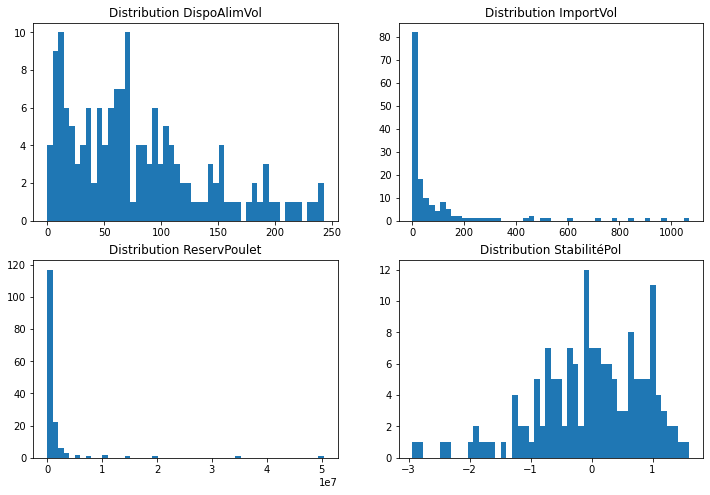

In [92]:
# Histogramme de variables
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.hist(volaille_5['DispoAlimVol'],bins=50)
ax1.set_title("Distribution DispoAlimVol")
ax2.hist(volaille_5['ImportVol'],bins=50)
ax2.set_title("Distribution ImportVol")
ax3.hist(volaille_5['ReservPoulet'],bins=50)
ax3.set_title("Distribution ReservPoulet")
ax4.hist(volaille_5['StabilitéPol'],bins=50)
ax4.set_title("Distribution StabilitéPol")

plt.show()

In [93]:
# Calcul de l'asymétrie des variables

skewness = []
variables = volaille_5.columns.values.tolist()

for i in volaille_5 :
    skew0 = volaille_5[i].skew()
    skewness.append(skew0)

In [94]:
data_skew=pd.DataFrame({'Variables':variables,'Skewness':skewness})

In [95]:
data_skew1 = data_skew.sort_values('Skewness')

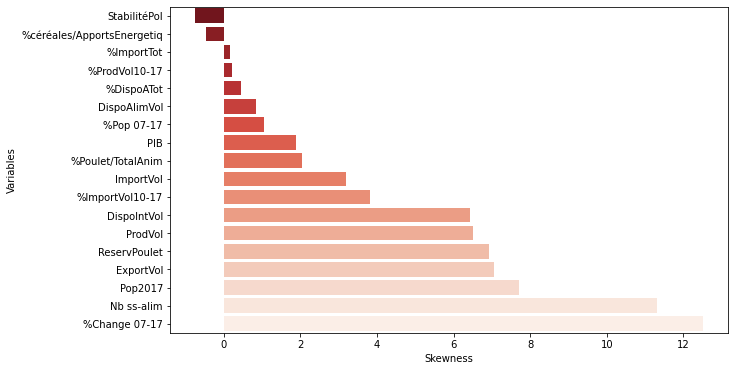

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data_skew1['Skewness'], y=data_skew1['Variables'], palette="Reds_r")
plt.show()

Pour la plupart des variables, le skewness est > 0. Dans ce cas, la distribution des données est étalée à droite et ne suit pas une loi normale.  

### 2.2.2 Dispersion des données

In [97]:
from scipy.stats import variation

cv = variation(volaille_5)
std1 = np.std(volaille_5)
mean1 = np.mean(volaille_5)

Le coefficient de variation (CV) est le rapport de l'écart-type à la moyenne. Plus la valeur du coefficient de variation est élevée, plus la dispersion autour de la moyenne est grande. Il est généralement exprimé en pourcentage. Sans unité, il permet la comparaison de distributions de valeurs dont les échelles de mesure ne sont pas comparables.

In [98]:
cvar =pd.DataFrame({'Coeff variation':cv, 'Moyenne':mean1,'Ecart-type':std1})

In [99]:
cvar.sort_values(by='Coeff variation')

,Coeff variation,Moyenne,Ecart-type
StabilitéPol,-43.527804,-2.044586e-02,8.899634e-01
%céréales/ApportsEnergetiq,0.381300,4.291083e+01,1.636190e+01
%DispoATot,0.555456,3.361657e+01,1.867251e+01
%ImportTot,0.665071,4.742027e+01,3.153783e+01
DispoAlimVol,0.752999,7.970064e+01,6.001448e+01
%Pop 07-17,0.990237,1.468252e+01,1.453918e+01
PIB,1.010263,2.084716e+04,2.106112e+04
%Poulet/TotalAnim,1.071399,1.950860e+01,2.090148e+01
%ProdVol10-17,1.493537,2.370817e+01,3.540904e+01
ImportVol,2.003413,9.580892e+01,1.919448e+02


De nombreuses variables ont un coefficient de variation supérieur à 100%, les données sont ainsi relativement disperséés.

### 2.2.3 Mise à l'échelle des données

**StandardScaler** [*soustrait la moyenne puis divise par l'écart type*] : met à l'échelle afin que moyenne ≈ 0 et écart type ≈ 1 (centre et réduit).  
**RobustScaler** [*soustrait la médiane puis divise par l'intervalle interquartile*] : à utiliser lorsqu'on souhaite réduire les effets des valeurs aberrantes.    
**MinMaxScaler** [*soustrait valeur minimale puis divise par la plage-max - min-*] : préserve la forme de la distribution d'origine et redimensionne les données dans une plage de valeur (0 à 1 par défaut).   
**MaxAbsScaler** [*divise par la valeur absolue maximale*] : mêmes effets que MinMaxScaler, mais rassemble sur une plage de (-1, 1). Cette technique est utile lorsque : forte dispersion, présence importante d’outliers, et existence de valeurs à la fois positives et négatives.

Lorsque la distribution n'est pas normale, la technique **StandardScaler** n'est pas recommandée. Nous ne souhaitons pas réduire pour l'instant les effets des valeurs aberrantes. Utilisons **MaxAbsScaler** car nous sommes en présence à la fois de valeurs positives et négatives dans certaines colonnes (par exemple StabilitéPol). 

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# Mise à l'échelle des données
scaler = MaxAbsScaler()
maxabs_scale = scaler.fit(X)
X_scaled = maxabs_scale.transform(X)

## 2.3 Projection des composantes et des individus

In [101]:
# Calcul des composantes principales
n_comp=14
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=14)

### 2.3.1 Analyse de la variance expliquée

La **variance expliquée** mesure la quantité de variation dans un ensemble de données qui peut être attribuée à chacune des composantes principales.  
La 1ere composante principale est la combinaison linéaire des variables qui explique le mieux la variabilité de l'échantillon. La 2e composante principale est la combinaison linéaire des variables qui explique le mieux la variance résiduelle....

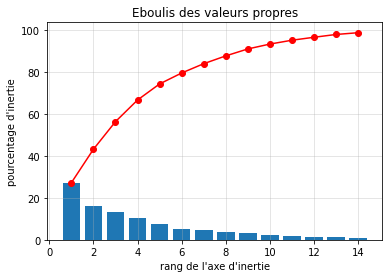

In [102]:
# Eboulis des valeurs propres
display_scree_plot(pca)
plt.show()

In [103]:
print(pca.explained_variance_ratio_.cumsum())

[0.27251104 0.43243288 0.5643668  0.66768422 0.74449848 0.79669489
 0.84115586 0.87843458 0.91159745 0.93484842 0.95328504 0.96734726
 0.98073333 0.98913576]


Dans notre modèle, 14 composantes permettent d'expliquer 99% de la variance totale (inertie = somme des variances des variables).  

Les 4 premières composantes principales expliquent 2/3 de la variance totale.

*Point important* : l'ACP est très sensible aux outliers (parfois un axe d'inertie n'est dû qu'à un groupe d'individus). Un individu situé très loin des autres à tendance à attirer certains axes d'inertie.

### 2.3.2 Analyse des 4 premières composantes principales

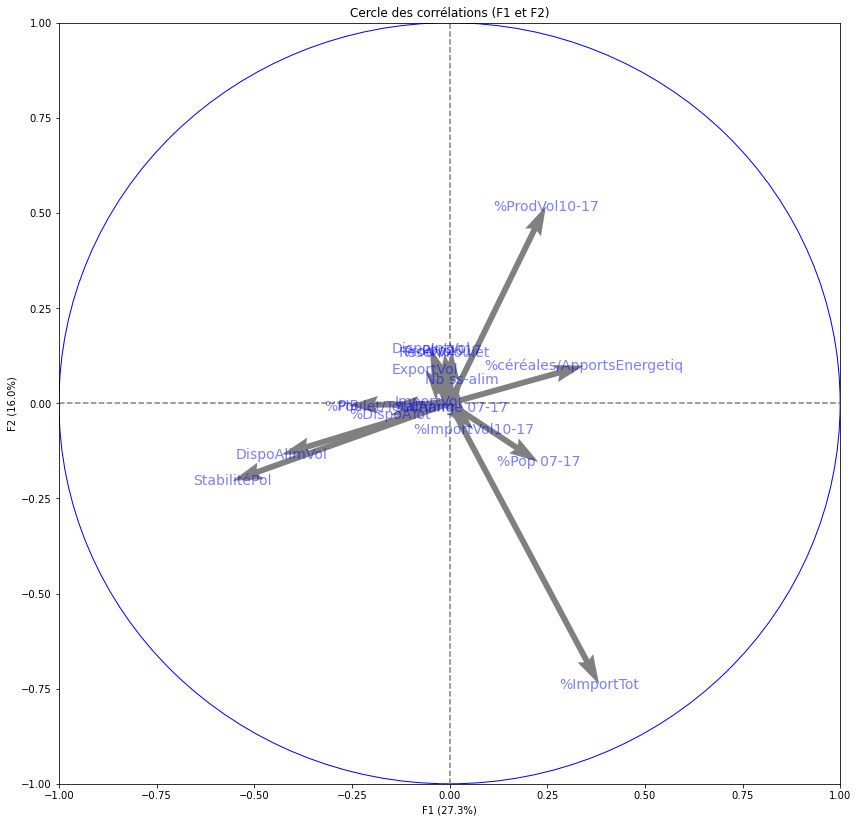

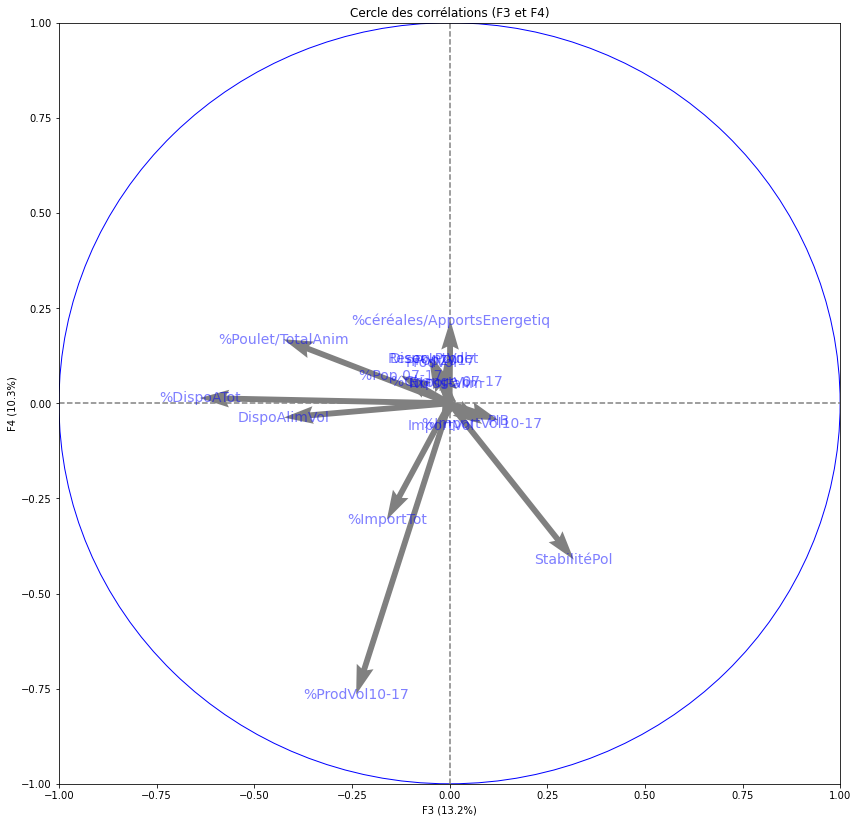

In [104]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))
plt.show()

**F1** (27,3% de l'inertie)

F1 est la combinaison linéaire de variables suivantes :

In [105]:
f1 = pca.components_[0]
(pd.DataFrame({'variable' : features, 'contribution' : f1})).sort_values(by='contribution')

,variable,contribution
16,StabilitéPol,-0.555059
0,DispoAlimVol,-0.429543
9,PIB,-0.257899
12,%Poulet/TotalAnim,-0.154603
5,%DispoATot,-0.151396
2,ExportVol,-0.061984
3,ImportVol,-0.055503
4,ProdVol,-0.049793
1,DispoIntVol,-0.047241
13,ReservPoulet,-0.012609


Les variables les plus corrélées négativement à F1 sont :  
- Stabilité politique  
- Disponibilité alimentaire en volaille 

Les variables les plus corrélées positivement à F1 sont :  
- Part des céréales dans les apports énergétiques  
- Part des importations de volaille dans le total des importations de viande

Nous pouvons résumer cette variable par l'**inverse** de la notion de **"Développement"** : Pays stable et avec un haut niveau de consommation de viande vs pays avec un faible niveau de consommation de viande et un besoin d'importation important.

   **F2** (16% de l'inertie)

In [106]:
f2 = pca.components_[1]
(pd.DataFrame({'variable' : features, 'contribution' : f2})).sort_values(by='contribution')

,variable,contribution
6,%ImportTot,-0.738237
16,StabilitéPol,-0.203689
8,%Pop 07-17,-0.154336
0,DispoAlimVol,-0.134827
11,%ImportVol10-17,-0.069712
5,%DispoATot,-0.030407
17,%Change 07-17,-0.011583
12,%Poulet/TotalAnim,-0.008529
9,PIB,-0.005441
3,ImportVol,0.004945


Cette composante est très fortement corrélée négativement avec la variable "Part des importations de volaille dans le total des importations de viande". La variable "Variation des volumes de production de volaille entre 2010 et 2017" est quand à elle  corrélée positivement (dans une moindre mesure).  
Nous pouvons résumer cette variable par la notion **"Effort d'autosuffisance"** (on peut estimer que la part faible des importations en volaille est le résultat de l'augmentation de la capacité de production).

**F3** (13,2% de l'inertie)

In [107]:
f3 = pca.components_[2]
(pd.DataFrame({'variable' : features, 'contribution' : f3})).sort_values(by='contribution')

,variable,contribution
5,%DispoATot,-0.639490
12,%Poulet/TotalAnim,-0.425655
0,DispoAlimVol,-0.423969
10,%ProdVol10-17,-0.239039
6,%ImportTot,-0.160675
8,%Pop 07-17,-0.124838
1,DispoIntVol,-0.051938
4,ProdVol,-0.045426
13,ReservPoulet,-0.041818
3,ImportVol,-0.021712


3 variables significativement corrélées négativement :  
- Part de la volaille dans le total de la disponibilité alimentaire en viande  
- Part de poulet dans le total des animaux
- Disponibilité alimentaire en volaille

Nous pouvons résumer cette variable par l'inverse de la notion de "**Spécialisation sur la volaille**" (production et consommation)

**F4** (10,3% de l'inertie)

Une variable fortement corrélée négativement : "Variation des volumes de production de volaille entre 2010 et 2017". Une autre variable est dans une moindre mesure corrélée négativement : "Stabilité politique".  
Nous pouvons résumer cette variable par l'inverse de la notion de "**Dynamique de production de volaille**"

Synthétisons :

**F1 : + Développement -   
F2 : - Effort d'autosuffisance +   
F3 : + Spécialisation sur la volaille -   
F4 : + Dynamique de production de volaille -**

Afin de confirmer les liaisons entre les variables, nous pouvons projeter la matrice de corrélation :

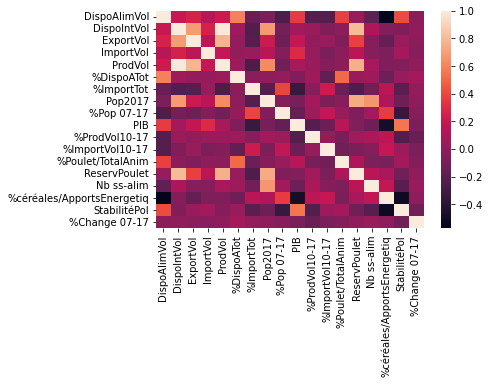

In [108]:
corr_vol = volaille_5.corr()
sns.heatmap(corr_vol)
plt.show()

Par exemple concernant F1, nous pouvons constater une bonne corrélation entre les variables DispoAlimVol, StabilitéPol ou encore PIB.

### 2.3.3 Projection des individus sur 2 plans factoriels

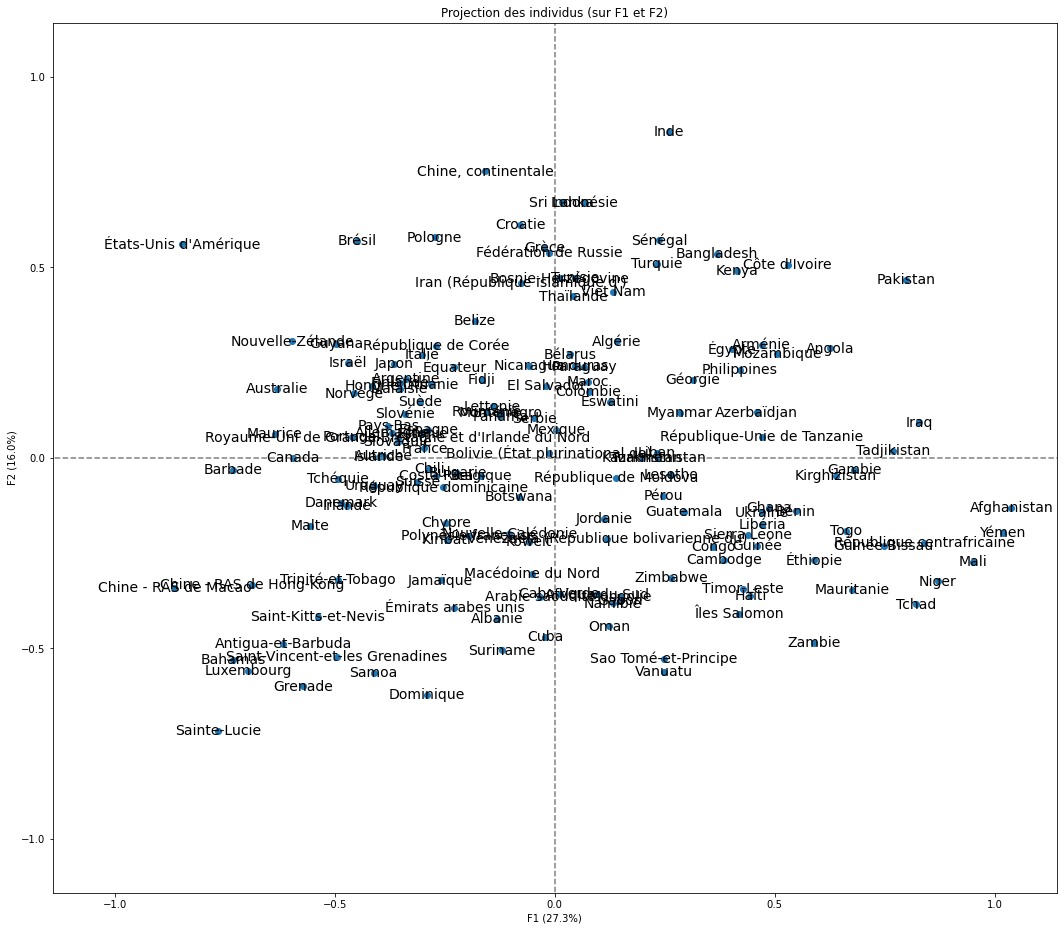

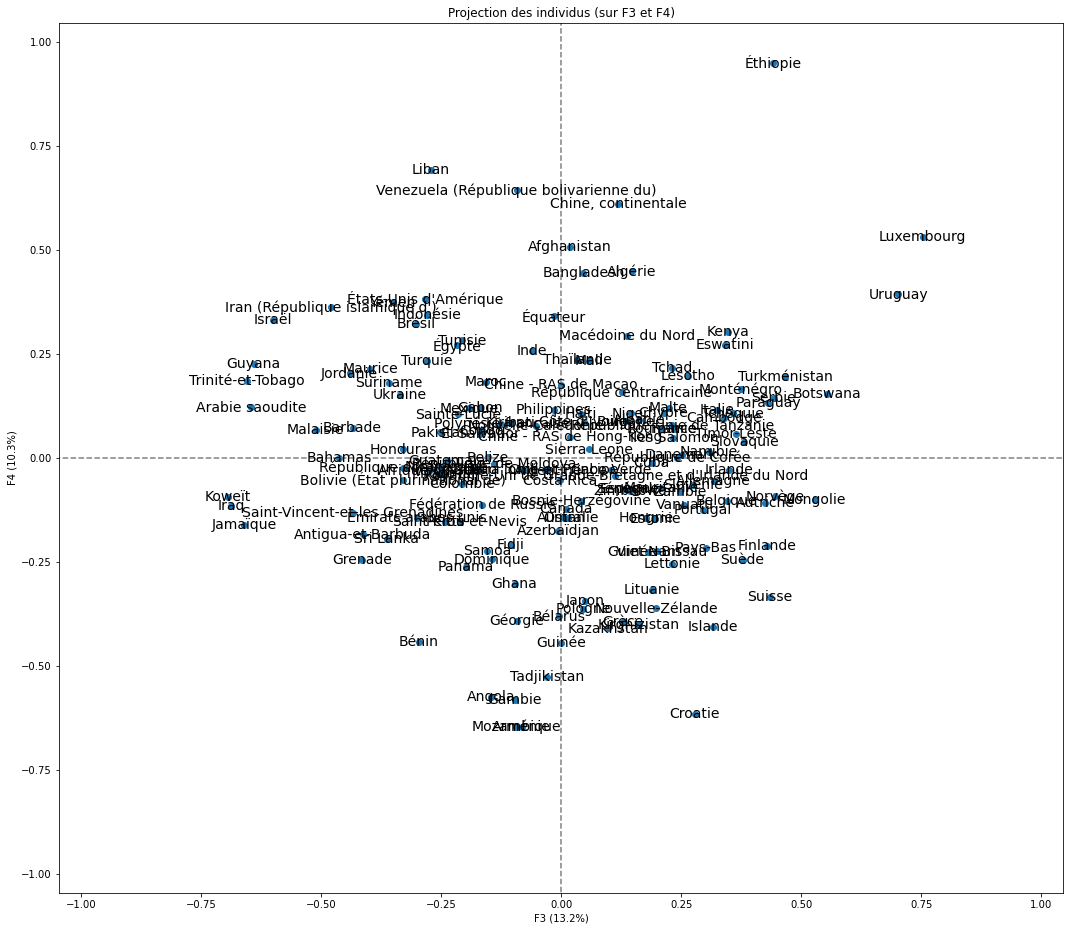

In [109]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels = np.array(names))

plt.show()

**Analyse de certains individus** :

Sur la base de la combinaison F1, l'Afghanistan, le Mali ou le Yémen feraient partie des pays les moins développés. Les Etats-Unis, Macao ou Sainte-Lucie seraient parmi les plus développés.

In [110]:
volaille_5.loc[(volaille_5.index == 'États-Unis d\'Amérique') | (volaille_5.index == 'Chine - RAS de Macao') | (volaille_5.index == 'Afghanistan') | (volaille_5.index == 'Mali'), ['StabilitéPol','DispoAlimVol','PIB','%céréales/ApportsEnergetiq']] 

,StabilitéPol,DispoAlimVol,PIB,%céréales/ApportsEnergetiq
Zone,,,,
Afghanistan,-2.80,5.0,2058.4,71.0
Chine - RAS de Macao,1.43,142.0,126144.0,29.0
Mali,-1.91,9.0,2246.8,68.0
États-Unis d'Amérique,0.29,219.0,59914.8,23.0


Concernant F2, l'effort d'autosuffisance serait important pour l'Inde, la Chine ou la Croatie, au contraire de Sainte-Lucie, Vanuatu ou le Luxembourg.

In [111]:
volaille_5.loc[(volaille_5.index == 'Inde') | (volaille_5.index == 'Chine, continentale') | (volaille_5.index == 'Sainte-Lucie') | (volaille_5.index == 'Croatie') | (volaille_5.index == 'Luxembourg'), ['%ProdVol10-17','%ImportTot']] 

,%ProdVol10-17,%ImportTot
Zone,,
"Chine, continentale",10.114124,14.632567
Croatie,110.344828,12.834225
Inde,59.254268,0.000000
Luxembourg,-100.000000,32.352941
Sainte-Lucie,-50.000000,71.428571


**Outliers** :

Sur les deux plans factoriels projetés, certains individus se situent parfois très loin des autres (Inde, Etats-Unis, Ethiopie par exemple). Dans le cadre de l'ACP, les outliers peuvent attirer fortement un axe d'inertie.

In [112]:
convert = pd.DataFrame(X_projected, index = names, columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14'])

In [113]:
convert.sort_values(by='F5')

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Zone,,,,,,,,,,,,,,
Maurice,-0.636528,0.063286,-0.397473,0.213953,-0.477820,0.248384,0.168274,0.217402,0.234282,-0.065792,0.043485,-0.005841,-0.048069,-0.015796
Guyana,-0.496923,0.298995,-0.640481,0.226802,-0.399261,-0.006863,0.006649,0.141273,0.017597,-0.026052,-0.035537,-0.040350,-0.043319,-0.032188
Sri Lanka,0.016170,0.670815,-0.363295,-0.195397,-0.368145,0.010030,0.100748,0.178351,-0.266872,0.147745,-0.005483,0.247725,-0.211091,-0.071424
Liban,0.231521,0.013820,-0.271830,0.692886,-0.308262,0.230970,-0.244150,-0.258869,0.327472,0.011970,0.092234,-0.091601,-0.092862,-0.051498
Barbade,-0.730723,-0.031208,-0.434404,0.071988,-0.305481,0.029685,0.126733,0.098583,0.125267,-0.094250,0.044657,-0.147281,0.042101,0.012402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chine - RAS de Hong-Kong,-0.687989,-0.332821,0.019422,0.050619,0.458887,0.261866,-0.495577,0.238101,-0.134782,-0.142359,-0.020547,-0.156897,0.094433,-0.002183
Mexique,0.003545,0.074007,-0.191532,0.118831,0.599477,0.212951,-0.442171,0.301170,-0.160670,-0.009621,0.161087,-0.183049,-0.008474,-0.002332
Brésil,-0.449790,0.568778,-0.302009,0.322007,0.820136,-0.250406,0.436264,-0.382359,-0.037427,-0.493193,0.003203,0.107179,-0.177205,-0.122530


# 3. Classification ascendante hiérarchique

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

Spécificités de la classification hiérarchique :  
    - pas de définition du nombre de cluster au préalable,  
    - nécessite beaucoup de temps et d'espace mémoire (plus destiné aux petits échantillons)

## 3.1 Dendrogramme

Le dendogramme est l'arbre qui regroupe les différents clusters.

In [115]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(20,50))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.ylabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "top")
    plt.axhline(y=3.2,color='#f60d06',linestyle="--")
    plt.show()

### 3.1.1 Choix de la méthode de lien

Dans un dendrogramme, la distance entre les clusters est visible sur l'axe des y (mesure de la proximité). Plusieurs méthodes existent pour appréhender cette distance. Dans un premier temps, nous allons calculer le coefficient de corrélation cophénétique correspondant à chaque méthode. Le coefficient de corrélation cophénétique se définit comme une mesure de la corrélation entre la distance d'origine des points et la distance sur le dendrogramme.

In [116]:
# Calcul des distances d'origine
Y = pdist(X_scaled)

# Clustering hiérarchique suivant les méthodes de lien
Z1 = linkage(X_scaled, 'single')
Z2 = linkage(X_scaled, 'complete')
Z3 = linkage(X_scaled, 'average')
Z4 = linkage(X_scaled, 'centroid')
Z5 = linkage(X_scaled, 'ward')

In [117]:
# Calcul du coefficient cophénétique pour chaque méthode

ccoph = []
Z = [Z1, Z2, Z3, Z4, Z5]

for i in Z :
    [c, D] = cophenet(i, pdist(X_scaled))
    ccoph.append(c)

coeff_cophen = pd.DataFrame({ 'méthode' : ['simple','complet','moyen','centroid','ward'], 'ccophen' : ccoph})

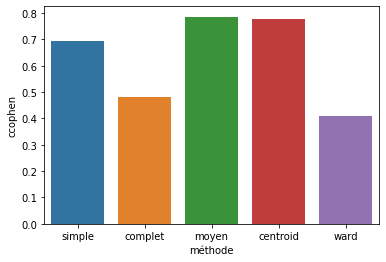

In [118]:
sns.barplot(x=coeff_cophen['méthode'], y=coeff_cophen['ccophen'])
plt.show()

In [119]:
coeff_cophen

,méthode,ccophen
0,simple,0.695666
1,complet,0.481346
2,moyen,0.786429
3,centroid,0.777909
4,ward,0.410710


Plus l'indice de Cophenet est proche de 1, plus la distance d'origine entre les points augmente avec la distance entre les clusters de ces points sur le dendrogramme. Sur la base de ce coefficient, la méthode du lien moyen permet la meilleure corrélation entre ces distances.

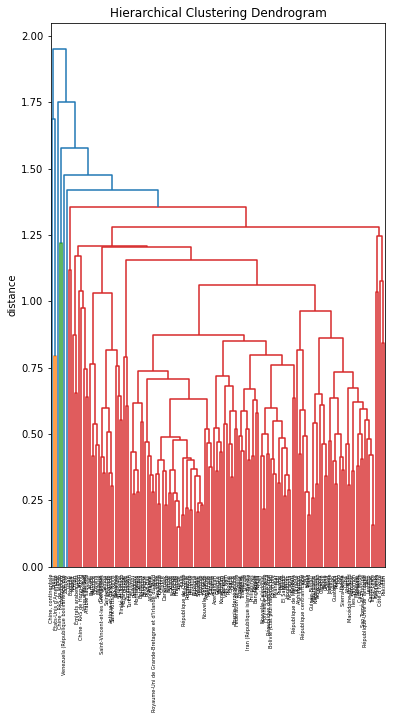

In [120]:
# Affichage du dendrogramme lien moyen
plt.figure(figsize=(6,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
        Z3,
        labels = names,
        orientation = "top")
plt.show()

La méthode du lien moyen (comme les autres méthodes) permet de garantir que les clusters sont bien séparés. Cependant, dans le cadre de mon clustering hiérarchique, je cherche également une homogénéité dans mes clusters (contraction du nuage de points). La **méthode de Ward**, qui cherche à minimiser l'augmentation de l'inertie intraclasse, parait la plus appropriée dans ce cadre.

Le visuel du dendrogramme ci-dessus nous apporte des informations sur la présence éventuelle d'outliers dans notre jeu de données (à gauche du graphique).

### 3.1.2 Dendrogramme (méthode de Ward)

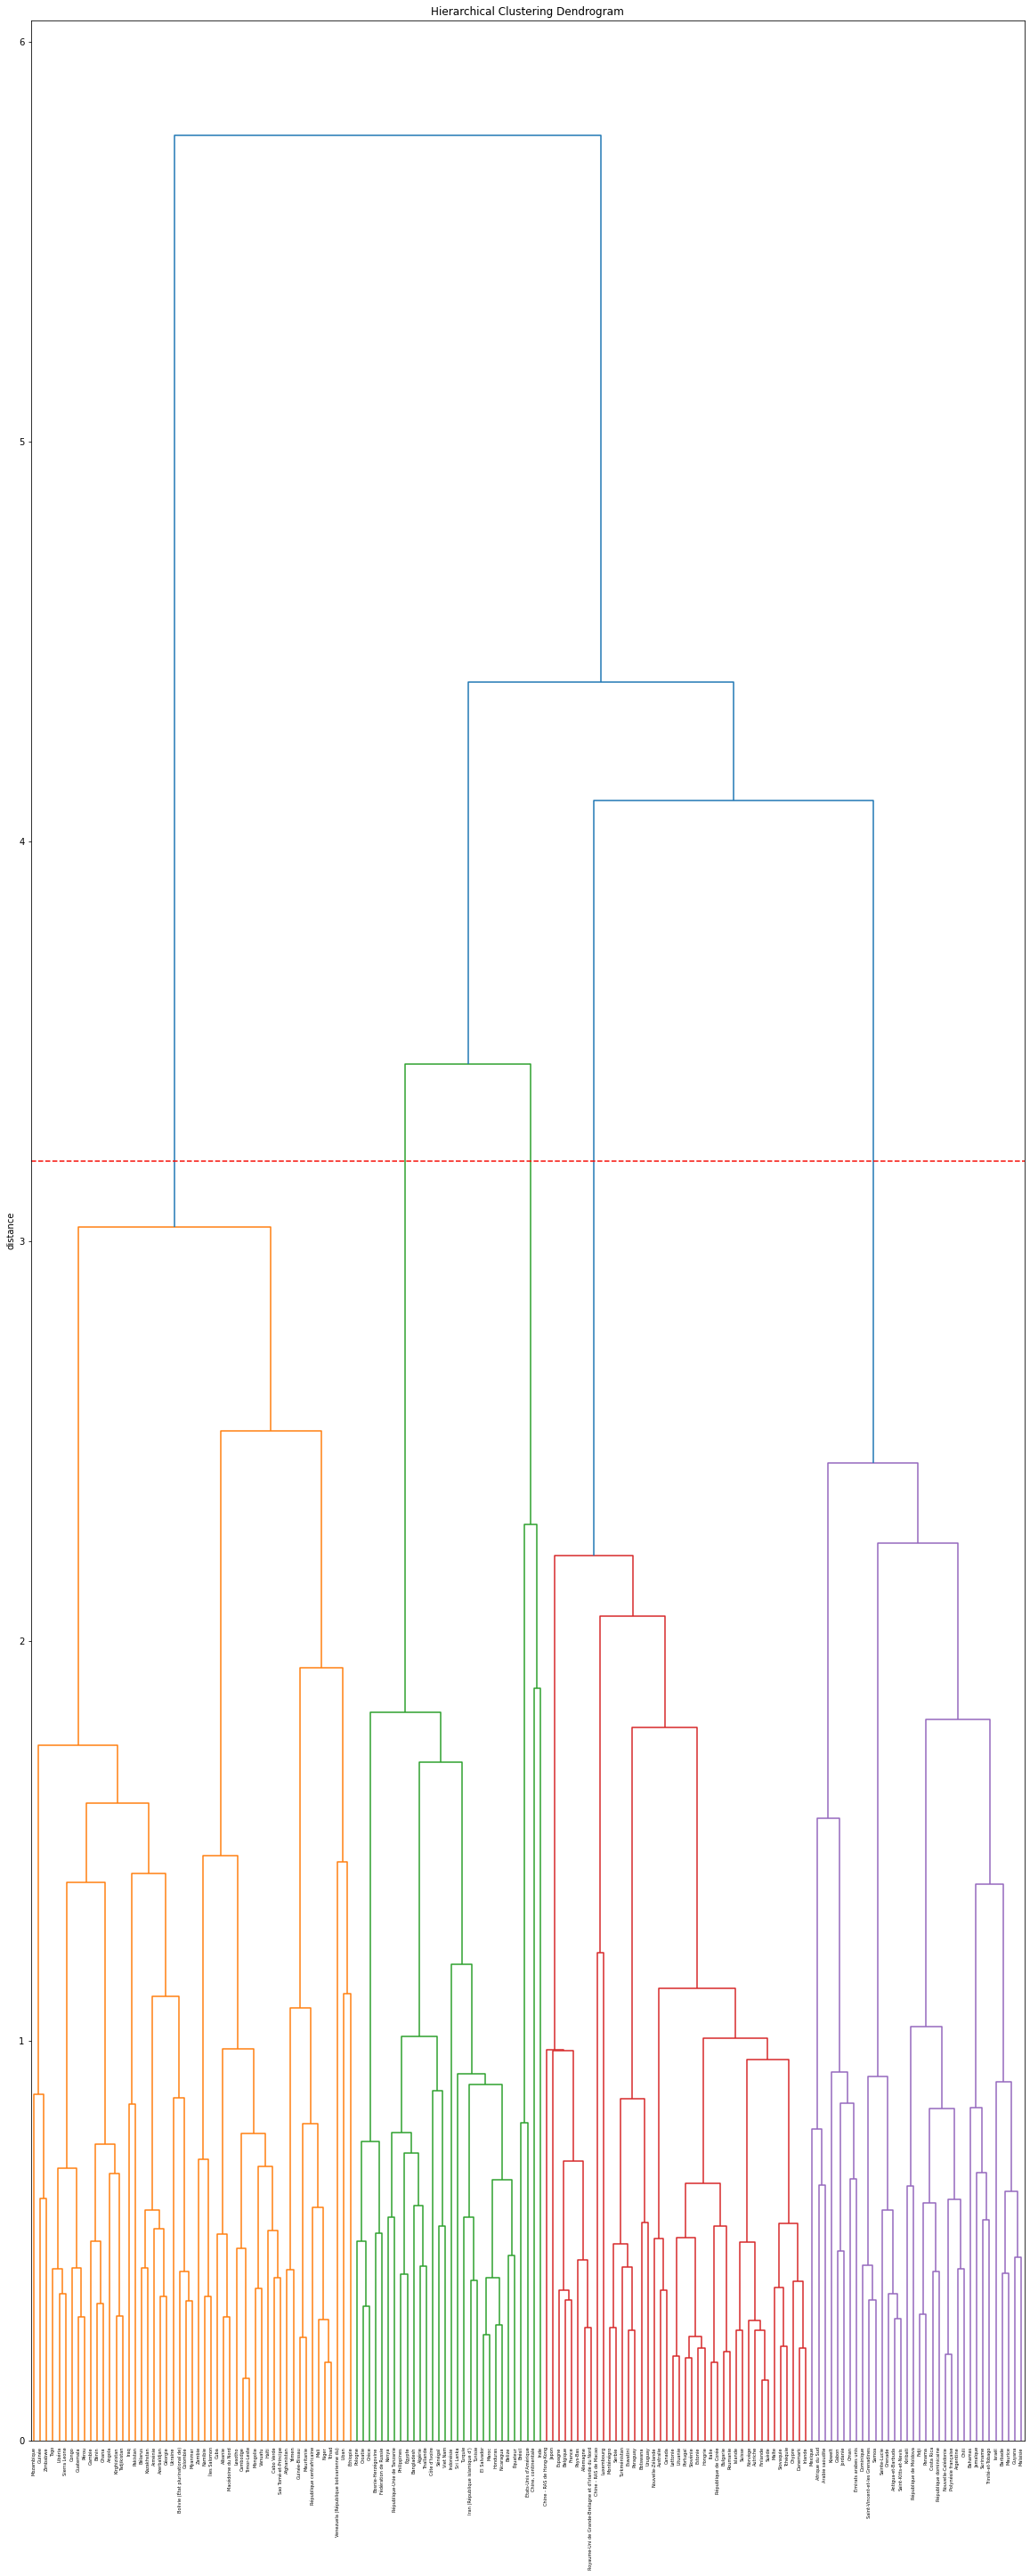

In [121]:
plot_dendrogram(Z5, names)

## 3.2 Analyse de la classification

La méthode fcluster(Z, t, 'criterion') permet de former des clusters à partir du clustering hiérarchique. Plusieurs options sont possibles pour le paramètre 'criterion', notamment :  
- distance : forme des clusters à condition que les observations d'origine dans chaque cluster aient une distance cophénétique égale ou inférieure à t. On peut résumer cette définition par "la distance maximale inter-cluster".
- maxclust : formera au maximum t cluster.

### 3.2.1 Silhouette score

Le silhouette score est une mesure de la qualité d'un clustering. Sa valeur est comprise entre (-1, 1). Plus la valeur est proche de 1, mieux les clusters sont séparés.

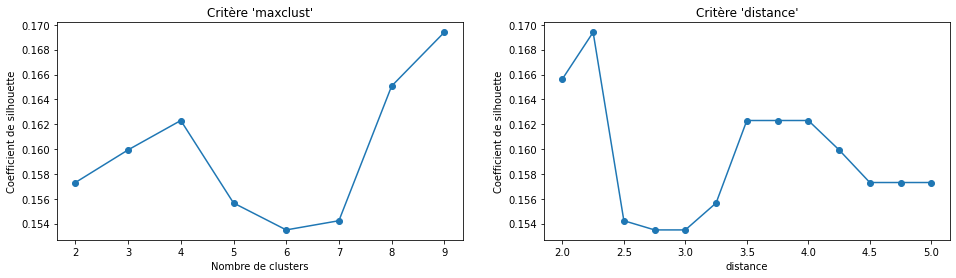

In [122]:
# Calcul du coefficient de silhouette pour différents critères
from sklearn import cluster, metrics

silhouettes0 = []
silhouettes1 = []

for i in range(2, 10) : 
    clusters1 = fcluster(Z5, i, criterion='maxclust')
    silh0 = metrics.silhouette_score(X_scaled,clusters1)
    silhouettes0.append(silh0)

for j in np.arange(2, 5.2, 0.25) :
    clusters2 = fcluster(Z5, j, criterion='distance')
    silh1 = metrics.silhouette_score(X_scaled,clusters2)
    silhouettes1.append(silh1)
    

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16, 4))     

ax1.plot(range(2, 10), silhouettes0, marker='o')
ax1.set_title("Critère 'maxclust'")
ax1.set_xlabel('Nombre de clusters')
ax1.set_ylabel('Coefficient de silhouette')

ax2.plot(np.arange(2, 5.2, 0.25), silhouettes1, marker='o')
ax2.set_title("Critère 'distance'")
ax2.set_xlabel('distance')
ax2.set_ylabel('Coefficient de silhouette')

plt.show()

Plusieurs constats :   
 - le score silhouette est plus élevé pour la création de 9 clusters,  
 - les scores silhouettes sont relativement similaires peu importe le nombre de clusters (compris entre 0.15 et 0.17),  
 - les scores silhouettes sont plutôt proches de 0 (peu d'étanchéité entre les clusters).  
 
Afin de faciliter mon étude et de favoriser les regroupements entre pays, je privilégie la création de 5 clusters. Cette répartition me permet d'isoler certains pays avec des caractéristiques particulières (Brésil, Chine, Inde, Etats-Unis), tout en conservant d'autres clusters de taille homogène.

*NB : le clustering par la méthode du lien moyen génère des scores silhouettes plus proches de 1 (qualité de séparation plus optimale). Cependant, lors du découpage en 4 clusters, 3/4 des clusters regroupent un faible nombre de pays (outliers) et le dernier cluster regroupe la grande majorité des pays.*

### 3.2.2 Création des clusters et projection des individus

In [123]:
# Sélection du nombre de clusters pour l'analyse
clusters0 = fcluster(Z5, 5, criterion='maxclust')

In [124]:
# Création du dataframe Pays : N°cluster
final_clusters = pd.DataFrame({"Zone": names, "cluster": clusters0})

In [125]:
volaille_cluster = volaille_5.copy()
volaille_cluster['cluster'] = clusters0

In [126]:
for c1 in range(1,6):
    cluster_members1=volaille_cluster[volaille_cluster['cluster'] == c1][:]
    print('Cluster{}(n={}):'.format(c1, len(cluster_members1)))
    print(cluster_members1.index)
    print('-'* 17)

Cluster1(n=51):
Index(['Afghanistan', 'Albanie', 'Angola', 'Arménie', 'Azerbaïdjan',
       'Bolivie (État plurinational de)', 'Bélarus', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Colombie', 'Congo', 'Cuba', 'Gambie', 'Ghana', 'Guatemala',
       'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Iraq', 'Kazakhstan',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord',
       'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Myanmar', 'Namibie',
       'Niger', 'Pakistan', 'Pérou', 'République centrafricaine',
       'Sao Tomé-et-Principe', 'Sierra Leone', 'Tadjikistan', 'Tchad',
       'Timor-Leste', 'Togo', 'Ukraine', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Yémen', 'Zambie', 'Zimbabwe',
       'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Zone')
-----------------
Cluster2(n=26):
Index(['Algérie', 'Bangladesh', 'Belize', 'Bosnie-Herzégovine', 'Croatie',
       'Côte d'Ivoire', 'El Salvador', 'Fédération de Russie', 'Grèce',
       'Ho

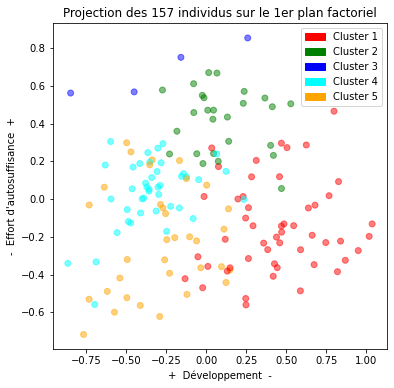

In [127]:
import matplotlib.patches as mpatches

# Attribution des couleurs
colors = ['red','green','blue','cyan','orange']

dataPointColor=[]
for row in clusters0-1:
    dataPointColor.append(colors[row])

# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize=(6,6))
red_patch0 = mpatches.Patch(color='red', label='Cluster 1')
green_patch0 = mpatches.Patch(color='green', label='Cluster 2')
blue_patch0 = mpatches.Patch(color='blue', label='Cluster 3')
cyan_patch0 = mpatches.Patch(color='cyan', label='Cluster 4')
orange_patch0 = mpatches.Patch(color='orange', label='Cluster 5')

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=dataPointColor, cmap = 'jet', alpha=.5)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.xlabel('+  Développement  -')
plt.ylabel('-  Effort d\'autosuffisance  +')
plt.legend(handles=[red_patch0, green_patch0, blue_patch0, cyan_patch0, orange_patch0])

plt.show()

### 3.2.3 Analyse des caractéristiques des clusters

In [128]:
volaille_scale = pd.DataFrame(data=X_scaled, index=names, columns=features)

In [129]:
cah_clust = pd.merge(volaille_scale,final_clusters,on='Zone',how='inner')

In [130]:
cah_meanclust = cah_clust.groupby('cluster').mean()

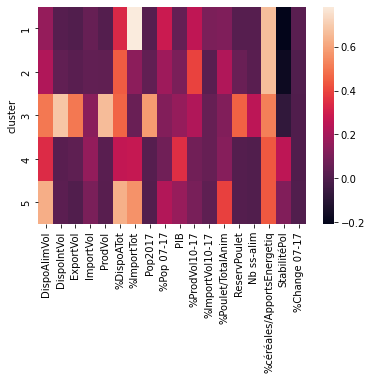

In [131]:
sns.heatmap(cah_meanclust)
plt.show()

**Cluster n°1** :    
    - Disponibilité en viande faible (également sur la volaille)  
    - Les importations de viande sont centrées sur le produit volaille  
    - instabilité économique et politique, dynamique démographique

In [132]:
volaille_5.loc[(volaille_5.index == 'Albanie') | (volaille_5.index == 'Angola') | (volaille_5.index == 'Afghanistan') | (volaille_5.index == 'Arménie'), ['StabilitéPol','DispoAlimVol','PIB','%céréales/ApportsEnergetiq','%ImportTot']] 

,StabilitéPol,DispoAlimVol,PIB,%céréales/ApportsEnergetiq,%ImportTot
Zone,,,,,
Afghanistan,-2.80,5.0,2058.4,71.0,82.857143
Albanie,0.38,85.0,12771.0,35.0,74.509804
Angola,-0.38,35.0,7310.9,60.0,66.109785
Arménie,-0.62,54.0,12115.1,42.0,72.916667


**Cluster n°2** :  
- Profil similaire au cluster n°1  
- Diffère au niveau de la production (plus dynamique sur la volaille) et des importations (moins centrées sur la volaille)

In [133]:
volaille_5.loc[(volaille_5.index == 'Belize') | (volaille_5.index == 'Bangladesh') | (volaille_5.index == 'Algérie') | (volaille_5.index == 'Bosnie-Herzégovine'), ['StabilitéPol','DispoAlimVol','PIB','%céréales/ApportsEnergetiq','%ImportTot','%ProdVol10-17']] 

,StabilitéPol,DispoAlimVol,PIB,%céréales/ApportsEnergetiq,%ImportTot,%ProdVol10-17
Zone,,,,,,
Algérie,-0.92,22.0,11737.4,50.0,3.846154,0.000000
Bangladesh,-1.26,7.0,4894.6,78.0,0.000000,22.660099
Belize,0.04,110.0,7140.9,39.0,0.000000,42.857143
Bosnie-Herzégovine,-0.35,56.0,13753.8,45.0,15.384615,60.526316


**Cluster n°3** :  
- Population élevée
- Forte capacité de production, prioritairement dirigée vers la consommation intérieure puis vers l'exportation le cas échéant  
- Faible niveau d'importation de volaille en comparaison aux autres viandes

In [134]:
volaille_5.loc[(volaille_5.index == 'Brésil') 
               | (volaille_5.index == 'Chine, continentale') 
               | (volaille_5.index == 'Inde') 
               | (volaille_5.index == 'États-Unis d\'Amérique'), 
               ['StabilitéPol','DispoAlimVol','%céréales/ApportsEnergetiq','%ImportTot','ProdVol','ExportVol','Pop2017']] 

,StabilitéPol,DispoAlimVol,%céréales/ApportsEnergetiq,%ImportTot,ProdVol,ExportVol,Pop2017
Zone,,,,,,,
Brésil,-0.47,204.0,32.0,4.477612,14201.0,4223.0,207833.823
"Chine, continentale",0.00,59.0,50.0,14.632567,18236.0,576.0,1421021.791
Inde,-0.76,7.0,56.0,0.000000,3545.0,4.0,1338676.785
États-Unis d'Amérique,0.29,219.0,23.0,5.263158,21914.0,3692.0,325084.756


**Cluster n°4** :  
- 'riche' et/ou stable politiquement
- La disponibilité alimentaire est plutôt générée par d'autres viandes que la volaille

In [135]:
volaille_5.loc[(volaille_5.index == 'Allemagne')
               | (volaille_5.index == 'Australie') 
               | (volaille_5.index == 'Autriche') 
               | (volaille_5.index == 'Botswana'), 
               ['StabilitéPol','DispoAlimVol','PIB','%ImportTot','ProdVol','%Poulet/TotalAnim','%DispoATot',]] 

,StabilitéPol,DispoAlimVol,PIB,%ImportTot,ProdVol,%Poulet/TotalAnim,%DispoATot
Zone,,,,,,,
Allemagne,0.59,71.0,53071.5,31.523774,1514.0,7.99,19.722222
Australie,0.90,192.0,48398.5,5.245902,1269.0,2.89,38.787879
Autriche,1.05,65.0,54173.0,28.645833,148.0,6.13,17.567568
Botswana,1.02,12.0,15948.0,33.333333,5.0,0.94,13.793103


**Cluster n°5** :  
- Forte disponibilité alimentaire en volaille
- Disponibilité générée par la capacité de production et/ou les importations

In [136]:
volaille_5.loc[(volaille_5.index == 'Afrique du Sud')
               | (volaille_5.index == 'Antigua-et-Barbuda') 
               | (volaille_5.index == 'Arabie saoudite') 
               | (volaille_5.index == 'Argentine'), 
               ['StabilitéPol','DispoAlimVol','PIB','%ImportTot','ProdVol','%Poulet/TotalAnim','%DispoATot']] 

,StabilitéPol,DispoAlimVol,PIB,%ImportTot,ProdVol,%Poulet/TotalAnim,%DispoATot
Zone,,,,,,,
Afrique du Sud,-0.28,143.0,13860.3,90.017513,1667.0,12.28,46.428571
Antigua-et-Barbuda,0.75,233.0,19840.3,70.000000,0.0,14.62,68.128655
Arabie saoudite,-0.64,151.0,47306.2,82.798165,616.0,49.03,70.892019
Argentine,0.17,182.0,23597.1,17.777778,2161.0,2.66,29.738562


# 4. K-means

K-means est un algorithme de clustering non hiérarchique, qui permet de rechercher efficacement une partition des données dont la variance intracluster est minimale. 

Spécificités du k_means : 
- contrairement au clustering hiérarchique, il est nécessaire de fixer au préalable le nombre de clusters (k), 
- faible coût de calcul et convient à un grand ensemble de données,
- non déterministe, les clusters obtenus peuvent changer légèrement si on relance l'algorithme plusieurs fois.

L’algorithme K-means identifie le nombre de centroïdes défini, un centroïde étant la moyenne arithmétique de tous les points de données appartenant à un cluster particulier. La variante k-means++ (initialisée par défaut dans *cluster.KMeans*) permet de créer des centroïdes initiaux "éparpillés".

L’algorithme attribue ensuite chaque point de données au cluster le plus proche en essayant de maintenir les clusters aussi petits que possible.

## 4.1 Choix du nombre de clusters

Nous allons aborder deux méthodes pour le choix des clusters : coefficient de silhouette et méthode du coude.

Le coefficient de silhouette a été abordé lors du chapitre précédent. La méthode du coude repose sur le calcul de la valeur d'inertie.  
L'inertie calcule la somme des distances au carré de chaque échantillon d'un cluster à son centre de cluster. Plus la valeur Inertia est petite, plus les différents clusters sont cohérents (si nb_échantillons = nb_clusters, alors inertia = 0). Pour utiliser la méthode du coude, il suffit de repérer le "point de coude" à partir duquel nous constatons une diminution de la baisse de la valeur inertie.

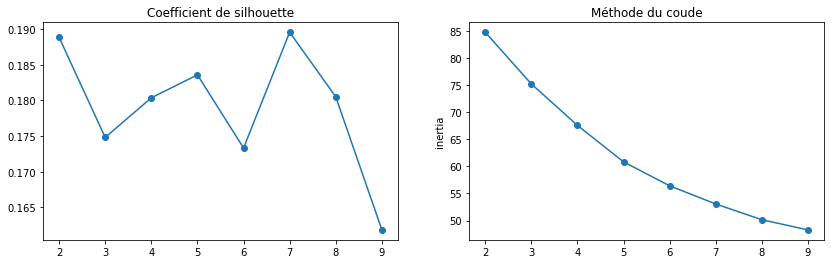

In [137]:
from sklearn.cluster import KMeans

silhouettes = []
inertia = []

for num_clusters in range(2, 10) : 
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=100, init='random')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled,cls.labels_)
    silhouettes.append(silh)
    inertia.append(cls.inertia_)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))     

ax1.plot(range(2, 10), silhouettes, marker='o')
ax1.set_title('Coefficient de silhouette')

ax2.plot(range(2,10), inertia, marker='o')
ax2.set_title('Méthode du coude')
ax2.set_ylabel('inertia')

plt.show()


Comme pour le clustering hiérarchique, le coefficient de silhouette propose des valeurs très similaires (entre 0.17 et 0.195) suivant le nombre de cluster. A partir de la méthode du coude, nous constatons une légère "cassure" à partir de 5 clusters. Ce choix me permettra également de comparer plus facilement le k-means avec la méthode de clustering hiérarchique.

## 4.2 Application du clustering aux données

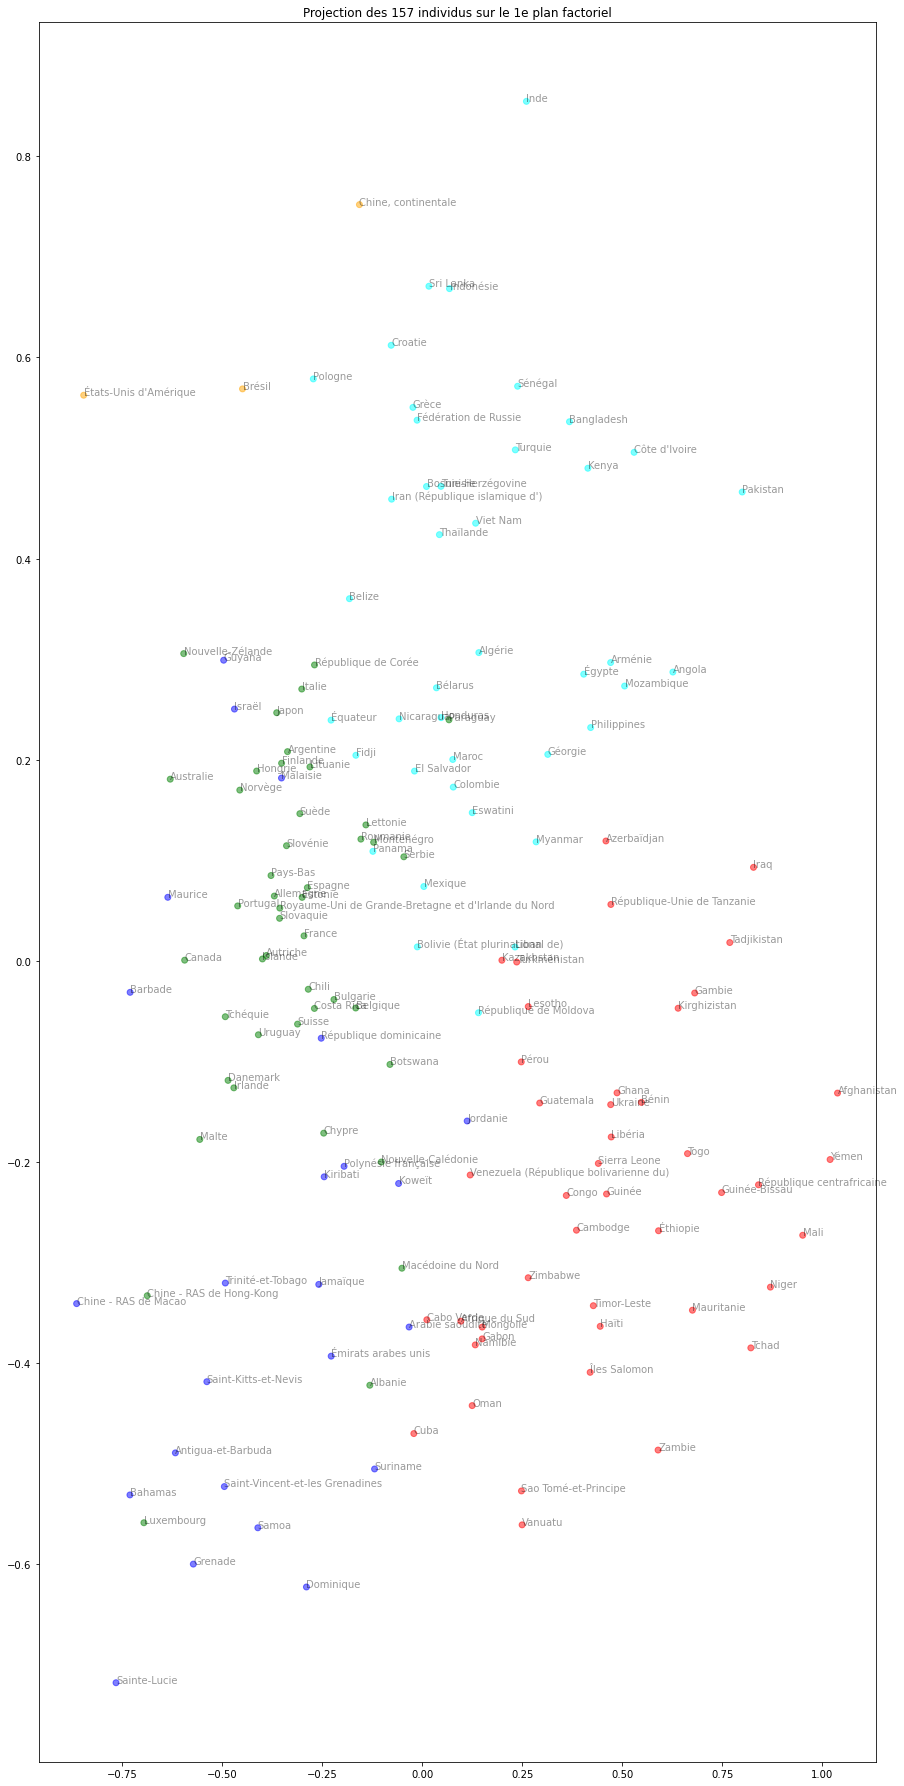

In [169]:
# Nombre de clusters souhaités
n_clust = 5

# Clustering par K-means
km = KMeans(n_clusters=n_clust, init = 'k-means++',n_init = 100)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Attribution des couleurs
colors = ['red','green','blue','cyan','orange']
centroidColor= []
for item in range(n_clust):
    centroidColor.append(colors[item])

dataPointColor1=[]
for row in clusters:
    dataPointColor1.append(colors[row])

# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.figure(figsize=(15,32))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=dataPointColor1, alpha=.5)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))

for i in range(len(X_projected)):
            plt.text(X_projected[i, 0], X_projected[i, 1], names[i], alpha= 0.4)

plt.show(block=False)

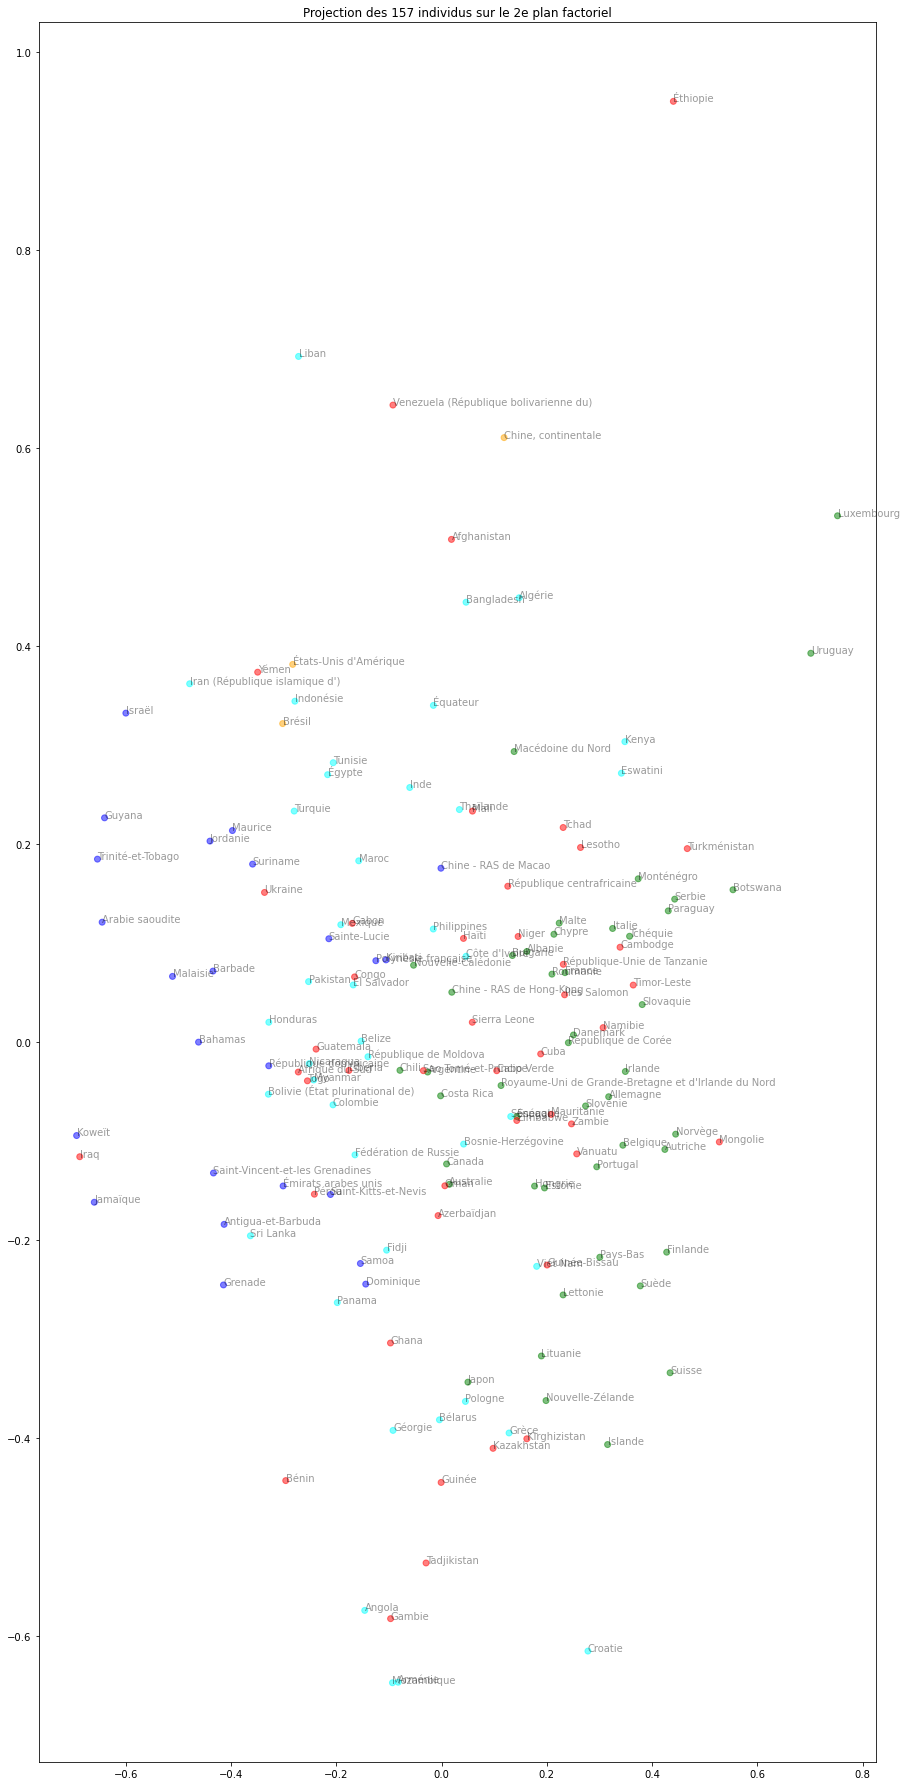

In [170]:
# Affichage du clustering par projection des individus sur le deuxieme plan factoriel
plt.figure(figsize=(15,32))
plt.scatter(X_projected[:, 2], X_projected[:, 3], c=dataPointColor1, alpha=.5)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(X_projected.shape[0]))

for i in range(len(X_projected)):
            plt.text(X_projected[i, 2], X_projected[i, 3], names[i], alpha= 0.4)

plt.show(block=False)

In [171]:
volaille_clust = volaille_5.copy()
volaille_clust['cluster'] = clusters

In [172]:
# liste des pays par cluster

for c0 in range(n_clust):
    cluster_members0=volaille_clust[volaille_clust['cluster'] == c0][:]
    print('Cluster{}(n={}):'.format(c0, len(cluster_members0)))
    print(cluster_members0.index)
    print('-'* 17)

Cluster0(n=44):
Index(['Afghanistan', 'Afrique du Sud', 'Azerbaïdjan', 'Bénin', 'Cabo Verde',
       'Cambodge', 'Congo', 'Cuba', 'Gabon', 'Gambie', 'Ghana', 'Guatemala',
       'Guinée', 'Guinée-Bissau', 'Haïti', 'Iraq', 'Kazakhstan',
       'Kirghizistan', 'Lesotho', 'Libéria', 'Mali', 'Mauritanie', 'Mongolie',
       'Namibie', 'Niger', 'Oman', 'Pérou', 'République centrafricaine',
       'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Sierra Leone',
       'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turkménistan',
       'Ukraine', 'Vanuatu', 'Venezuela (République bolivarienne du)', 'Yémen',
       'Zambie', 'Zimbabwe', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Zone')
-----------------
Cluster1(n=45):
Index(['Albanie', 'Allemagne', 'Argentine', 'Australie', 'Autriche',
       'Belgique', 'Botswana', 'Bulgarie', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chypre', 'Costa Rica', 'Danemark',
       'Espagne', 'Estonie', 'Finlande', 'France', 'Hon

## 4.3 Affichage des centroïdes

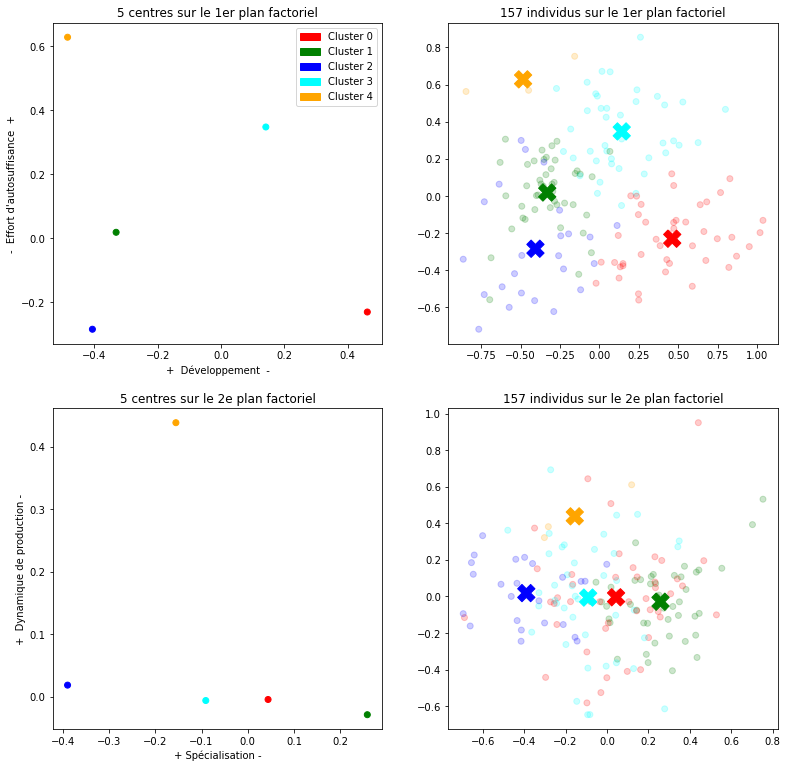

In [173]:
# Position des centres de classes
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

# Projection

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(13, 13))

red_patch = mpatches.Patch(color='red', label='Cluster 0')
green_patch = mpatches.Patch(color='green', label='Cluster 1')
blue_patch = mpatches.Patch(color='blue', label='Cluster 2')
cyan_patch = mpatches.Patch(color='cyan', label='Cluster 3')
orange_patch = mpatches.Patch(color='orange', label='Cluster 4')

ax1.scatter(centroids_projected[:,0],centroids_projected[:,1],c=centroidColor)
ax1.set_title("{} centres sur le 1er plan factoriel".format(len(centroids)))
ax1.set_xlabel('+  Développement  -')
ax1.set_ylabel('-  Effort d\'autosuffisance  +') 
ax1.legend(handles=[red_patch, green_patch, blue_patch, cyan_patch, orange_patch])

ax2.scatter(X_projected[:, 0], X_projected[:, 1], c=dataPointColor1, cmap = 'jet', alpha=0.2)
ax2.set_title("{} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
ax2.scatter(centroids_projected[:,0],centroids_projected[:,1],s=300,c=centroidColor,marker="X")

ax3.scatter(centroids_projected[:,2],centroids_projected[:,3],c=centroidColor)
ax3.set_title("{} centres sur le 2e plan factoriel".format(len(centroids)))
ax3.set_xlabel('+ Spécialisation -')
ax3.set_ylabel('+  Dynamique de production -')

ax4.scatter(X_projected[:, 2], X_projected[:, 3], c=dataPointColor1, cmap = 'jet', alpha=0.2)
ax4.set_title("{} individus sur le 2e plan factoriel".format(X_projected.shape[0]))
ax4.scatter(centroids_projected[:,2],centroids_projected[:,3],s=300,c=centroidColor,marker="X")

plt.show()

Le positionnement des centroides nous permet de visualiser les premières caractéristiques des clusters :  
    - le cluster n°4 correspond à la fois à un bon niveau de développement et un effort élevé d'autosuffisance alimentaire sur la volaille,  
    - le cluster n°0 affiche un niveau de développement moins élevé que les autres clusters,  
    - le cluster n°2 correspond à une production et une consommation centralisée sur la volaille (à l'inverse du cluster n°1).

### 4.4  Analyse des caractéristiques des clusters

In [174]:
# Création du dataframe (Zone : N° cluster)

predict = km.predict(X_scaled)
clustering = pd.DataFrame({'Zone' : names, 'cluster': predict})

In [175]:
k_clust = pd.merge(volaille_scale, clustering,on='Zone',how='inner')

In [176]:
k_meanclust = k_clust.groupby('cluster').mean()

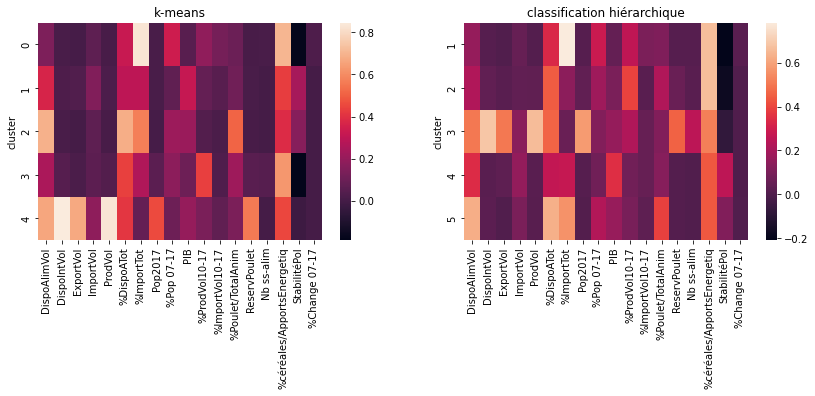

In [177]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))     

g1 = sns.heatmap(k_meanclust, ax=ax1)
g1.set_title('k-means')

g2 = sns.heatmap(cah_meanclust, ax=ax2) 
g2.set_title('classification hiérarchique')

plt.show()

**Cluster n°0** de k-means (similaire au cluster n°1 de la CAH) :  
- Carence en viande (également sur la volaille)      
- instabilité économique et politique  
- Importations de viande centrées sur le produit volaille  

**Cluster n°3** (similaire au cluster n°2 de la CAH) :
- Profil similaire au cluster n°0
- Diffère au niveau de la production (plus dynamique sur la volaille) et des importations (moins centrées sur la volaille)

**Cluster n°1** (similaire au cluster n°4 de la CAH) :
- 'riche' et/ou stable politiquement
- La disponibilité alimentaire est plutôt générée par d'autres viandes que la volaille

**Cluster n°2** (similaire au cluster n°5 de la CAH) :  
- Forte disponibilité alimentaire en volaille
- Disponibilité générée par la capacité de production et/ou les importations

Le **cluster n°4** fait référence au cluster n°3 de la CAH sans l'Inde. Cela à pour effet d'accentuer l'intensité des variables relatives à la disponibilité, aux exportations et à la production.

# 5. Comparaison des méthodes de clustering

## 5.1 Par la projection

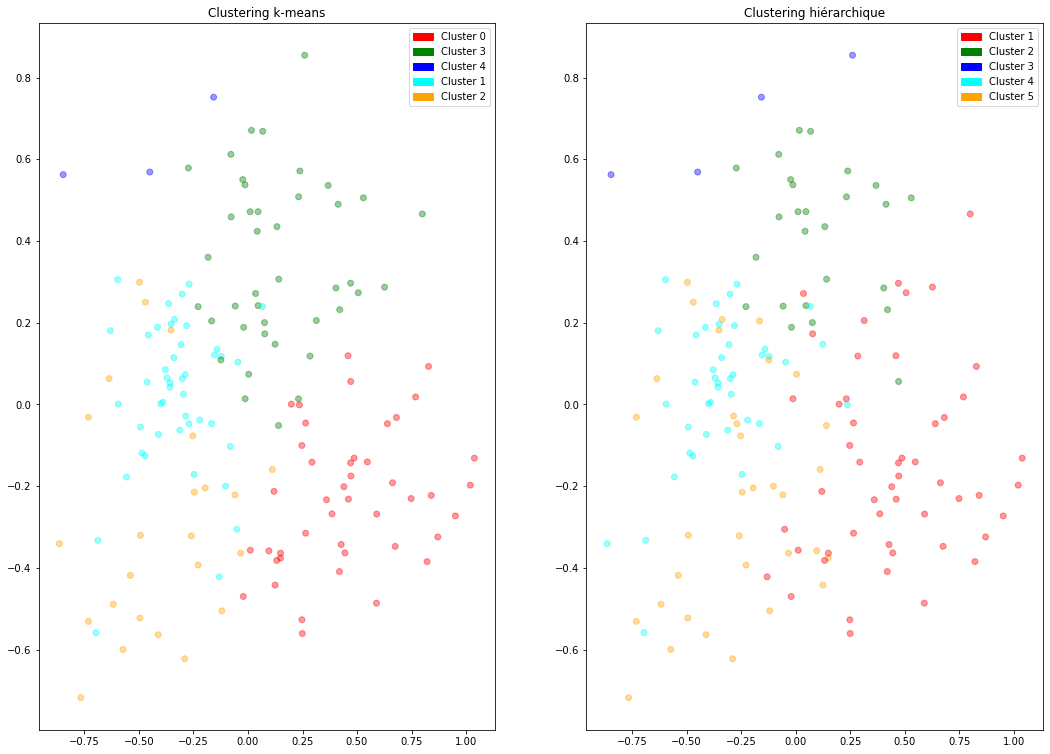

In [178]:
# Projection sur le premier plan factoriel

colors1 = ['red','cyan','orange','green','blue']

dataPointColor2=[]
for row in clusters:
    dataPointColor2.append(colors1[row])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 13))

red_patch1 = mpatches.Patch(color='red', label='Cluster 1')
green_patch1 = mpatches.Patch(color='green', label='Cluster 2')
blue_patch1= mpatches.Patch(color='blue', label='Cluster 3')
cyan_patch1 = mpatches.Patch(color='cyan', label='Cluster 4')
orange_patch1 = mpatches.Patch(color='orange', label='Cluster 5')

red_patch2 = mpatches.Patch(color='red', label='Cluster 0')
green_patch2 = mpatches.Patch(color='green', label='Cluster 3')
blue_patch2 = mpatches.Patch(color='blue', label='Cluster 4')
cyan_patch2 = mpatches.Patch(color='cyan', label='Cluster 1')
orange_patch2 = mpatches.Patch(color='orange', label='Cluster 2')

ax1.scatter(X_projected[:, 0], X_projected[:, 1], c=dataPointColor2, cmap = 'jet', alpha=0.4)
ax1.set_title("Clustering k-means")
ax1.legend(handles=[red_patch2, green_patch2, blue_patch2, cyan_patch2, orange_patch2])

ax2.scatter(X_projected[:, 0], X_projected[:, 1], c=dataPointColor, cmap = 'jet', alpha=0.4)
ax2.set_title("Clustering hiérarchique")
ax2.legend(handles=[red_patch1, green_patch1, blue_patch1, cyan_patch1, orange_patch1])

plt.show()

In [179]:
volaille_cluster.rename(columns = {'cluster':'cluster_CAH'}, inplace = True)

In [180]:
clusterings = pd.merge(volaille_cluster, clustering, on='Zone', how='inner')

In [181]:
clusterings.rename(columns = {'cluster':'cluster_K'}, inplace = True)

## 5.2 Exemple de liste des pays rattachés à des clusters différents

### Cluster K0 - CAH1

In [182]:
clusterings.loc[((clusterings['cluster_CAH'] == 1) & (clusterings['cluster_K'] != 0) & (clusterings['cluster_K'] != 3)), :]

,Zone,DispoAlimVol,DispoIntVol,ExportVol,ImportVol,ProdVol,%DispoATot,%ImportTot,Pop2017,%Pop 07-17,...,%ProdVol10-17,%ImportVol10-17,%Poulet/TotalAnim,ReservPoulet,Nb ss-alim,%céréales/ApportsEnergetiq,StabilitéPol,%Change 07-17,cluster_CAH,cluster_K
2,Albanie,85.0,47.0,0.0,38.0,13.0,32.319392,74.509804,2884.169,-4.938335,...,-23.529412,52.000000,10.54,78350.0,0.1,35.0,0.38,8.709120,1,1
84,Macédoine du Nord,68.0,41.0,1.0,40.0,2.0,37.777778,58.823529,2081.996,0.802256,...,-33.333333,21.212121,5.80,18400.0,0.0,36.0,-0.25,0.872719,1,1


Notons que k-means rattache l'Albanie et la Macédoine du Nord au cluster 1 des pays "'riche' et/ou stable politiquement et dont la disponibilité alimentaire est plutôt générée par d'autres viandes que la volaille"


In [185]:
clusterings.loc[((clusterings['cluster_CAH'] != 1) & (clusterings['cluster_K'] == 0) & (clusterings['cluster_CAH'] != 2)), :]

,Zone,DispoAlimVol,DispoIntVol,ExportVol,ImportVol,ProdVol,%DispoATot,%ImportTot,Pop2017,%Pop 07-17,...,%ProdVol10-17,%ImportVol10-17,%Poulet/TotalAnim,ReservPoulet,Nb ss-alim,%céréales/ApportsEnergetiq,StabilitéPol,%Change 07-17,cluster_CAH,cluster_K
1,Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,46.428571,90.017513,57009.756,16.062776,...,12.787551,108.943089,12.28,1746810.0,3.1,51.0,-0.28,5.620959e+01,5,0
49,Gabon,99.0,78.0,0.0,76.0,4.0,41.949153,75.247525,2064.823,40.218529,...,0.000000,43.396226,24.89,31780.0,0.3,52.0,-0.10,-3.611770e-09,5,0
102,Oman,73.0,114.0,16.0,126.0,7.0,37.628866,76.363636,4665.928,75.598440,...,16.666667,61.538462,5.90,48050.0,0.4,40.0,0.75,-1.746126e+01,5,0
141,Turkménistan,15.0,27.0,2.0,9.0,20.0,4.054054,37.500000,5757.667,18.223826,...,0.000000,350.000000,5.27,166490.0,0.2,57.0,-0.13,9.782297e+01,4,0


### Cluster K3 - CAH2

In [186]:
clusterings.loc[(clusterings['cluster_CAH'] != 2) & (clusterings['cluster_K'] == 3) & (clusterings['cluster_CAH'] != 1), :]

,Zone,DispoAlimVol,DispoIntVol,ExportVol,ImportVol,ProdVol,%DispoATot,%ImportTot,Pop2017,%Pop 07-17,...,%ProdVol10-17,%ImportVol10-17,%Poulet/TotalAnim,ReservPoulet,Nb ss-alim,%céréales/ApportsEnergetiq,StabilitéPol,%Change 07-17,cluster_CAH,cluster_K
44,Eswatini,22.0,7.0,0.0,2.0,6.0,16.541353,22.222222,1124.805,7.879235,...,0.000000,100.000000,9.93,38770.0,0.1,56.0,-0.27,56.209588,4,3
45,Fidji,97.0,26.0,0.0,3.0,23.0,46.190476,30.000000,877.459,4.935362,...,53.333333,50.000000,27.20,52950.0,0.0,50.0,0.62,5.942405,5,3
62,Inde,7.0,3661.0,4.0,0.0,3545.0,50.000000,0.000000,1338676.785,13.139458,...,59.254268,0.000000,4.26,7744150.0,176.3,56.0,-0.76,29.993787,3,3
91,Mexique,123.0,4219.0,9.0,972.0,3249.0,37.272727,47.764128,124777.324,14.295823,...,19.316930,38.068182,13.11,5561280.0,7.7,42.0,-0.80,42.948710,5,3
104,Panama,117.0,192.0,0.0,20.0,198.0,52.232143,40.816327,4106.769,18.910117,...,57.142857,81.818182,17.27,254530.0,0.3,44.0,0.39,-17.461257,5,3
116,République de Moldova,55.0,66.0,0.0,16.0,54.0,31.073446,66.666667,4059.684,-1.705803,...,31.707317,6.666667,53.33,378850.0,0.2,48.0,-0.32,25.773806,5,3


In [187]:
clusterings.loc[(clusterings['cluster_CAH'] == 2) & (clusterings['cluster_K'] != 3) & (clusterings['cluster_K'] != 0), :]

,Zone,DispoAlimVol,DispoIntVol,ExportVol,ImportVol,ProdVol,%DispoATot,%ImportTot,Pop2017,%Pop 07-17,...,%ProdVol10-17,%ImportVol10-17,%Poulet/TotalAnim,ReservPoulet,Nb ss-alim,%céréales/ApportsEnergetiq,StabilitéPol,%Change 07-17,cluster_CAH,cluster_K


Nous pouvons constater que quelques pays sont affectés à des clusters vraiment différents selon les méthodes de clustering.  Nous pouvons ici faire le lien avec les scores_silhouettes de chaque méthode de clustering assez proche de 0 (**faible étanchéité entre les clusters**).

# 6. Annexe : Clustering hors outliers

Nous constatons précédemment une faible étanchéité entre les clusters. Egalement, lors de notre clustering, nous avons relevé la présence d'outliers dans notre échantillon. Voyons si ces outliers ont un effet sur l'étanchéité du clustering.

## 6.1 Etude des outliers

In [188]:
import scipy.stats as stats

score z exprime la « distance » de la valeur à la moyenne en nombre d’écart-type.  
*Rappel* : Dans l'approche de la distribution normale, 99,7 % des valeurs se situent à moins de 3 écarts-types de la moyenne. Nos variables ne suivent pas nécessairement une loi normale, nous allons donc retenir un seuil du zscore supérieur à 3.

In [189]:
# Création du DataFrame des scores z pour chaque croisement d'individus et de dimensions
score_z = volaille_5.copy()   

In [190]:
score_z1 = np.abs(stats.zscore(score_z))

In [191]:
# Identification des individus pour lesquels les scores z sont supérieurs à 7
outliers = pd.DataFrame(columns = score_z1.columns)

for i in score_z1.columns :
    z = score_z1.loc[score_z1[i] > 7, :]
    outliers = pd.concat([outliers,z])
    outliers.drop_duplicates(inplace=True)

In [212]:
outl_color = 'yellow'
outliers.style.applymap(lambda x: 'background-color: %s' % outl_color if x > 7 else '')

,DispoAlimVol,DispoIntVol,ExportVol,ImportVol,ProdVol,%DispoATot,%ImportTot,Pop2017,%Pop 07-17,PIB,%ProdVol10-17,%ImportVol10-17,%Poulet/TotalAnim,ReservPoulet,Nb ss-alim,%céréales/ApportsEnergetiq,StabilitéPol,%Change 07-17
"Chine, continentale",0.344927,7.703479,0.969249,1.855695,6.785837,1.130891,1.039631,8.654611,0.626470,0.989841,0.383915,0.580234,0.015855,9.167811,0.188572,0.433273,0.022974,0.107495
États-Unis d'Amérique,2.321096,7.749895,7.503999,0.141661,8.214541,0.754899,1.336716,1.767520,0.449837,1.854965,0.333389,0.142277,0.264986,3.410320,0.188572,1.216902,0.348830,0.102518
Brésil,2.071156,4.087895,8.617591,0.483519,5.218457,0.549171,1.361624,1.030691,0.369439,0.300201,0.091968,0.967019,0.559702,2.387286,0.188572,0.666844,0.505138,0.074008
Inde,1.211385,1.293653,0.230327,0.499148,1.079177,0.877409,1.503600,8.137138,0.106131,0.696272,1.003871,0.461620,0.729546,1.163525,12.055171,0.799979,0.830994,0.076869
Zambie,1.144734,0.298194,0.236618,0.436630,0.278830,0.818489,1.667196,0.169467,1.383461,0.824370,0.275486,7.395894,0.243456,0.213464,0.193394,1.655625,0.191520,0.041028
Venezuela (République bolivarienne du),0.144976,0.047990,0.238716,0.368902,0.064796,0.877409,0.050712,0.090607,0.465916,0.989841,1.920353,1.087094,0.517121,0.059390,0.262842,0.177903,1.404051,12.479488


In [193]:
# Suppression des outliers
volaille_zoom = volaille_5.drop(index=['États-Unis d\'Amérique','Chine, continentale',
                                       'Brésil','Inde','Zambie','Venezuela (République bolivarienne du)'])

## 6.2 Mise à l'échelle des données et ACP

In [194]:
# Préparation des données pour l'ACP
X1 = volaille_zoom.values
names1 = volaille_zoom.index 
features1 = volaille_zoom.columns

In [195]:
# Mise à l'échelle des données
scaler = MaxAbsScaler()
maxabs_scale1 = scaler.fit(X1)
X_scaled1 = maxabs_scale1.transform(X1)

In [196]:
# Calcul des composantes principales
n_comp1=15
pca1 = decomposition.PCA(n_components=n_comp1)
pca1.fit(X_scaled1)

PCA(n_components=15)

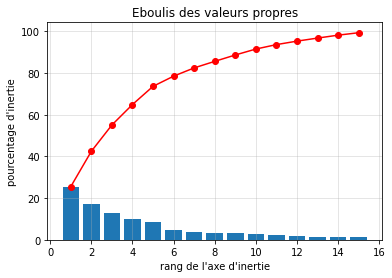

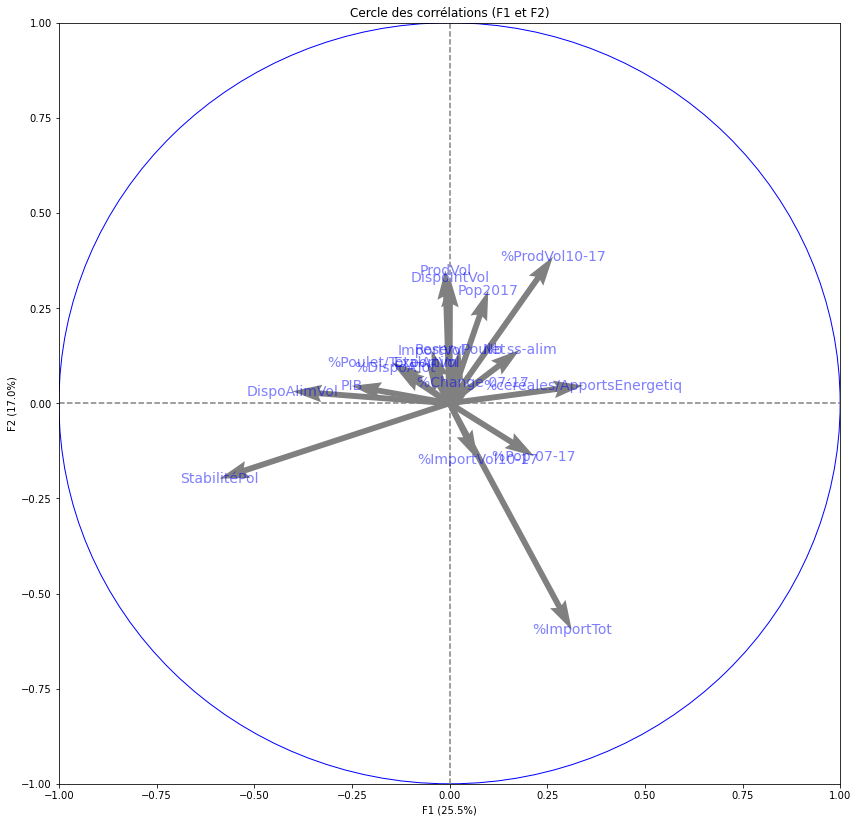

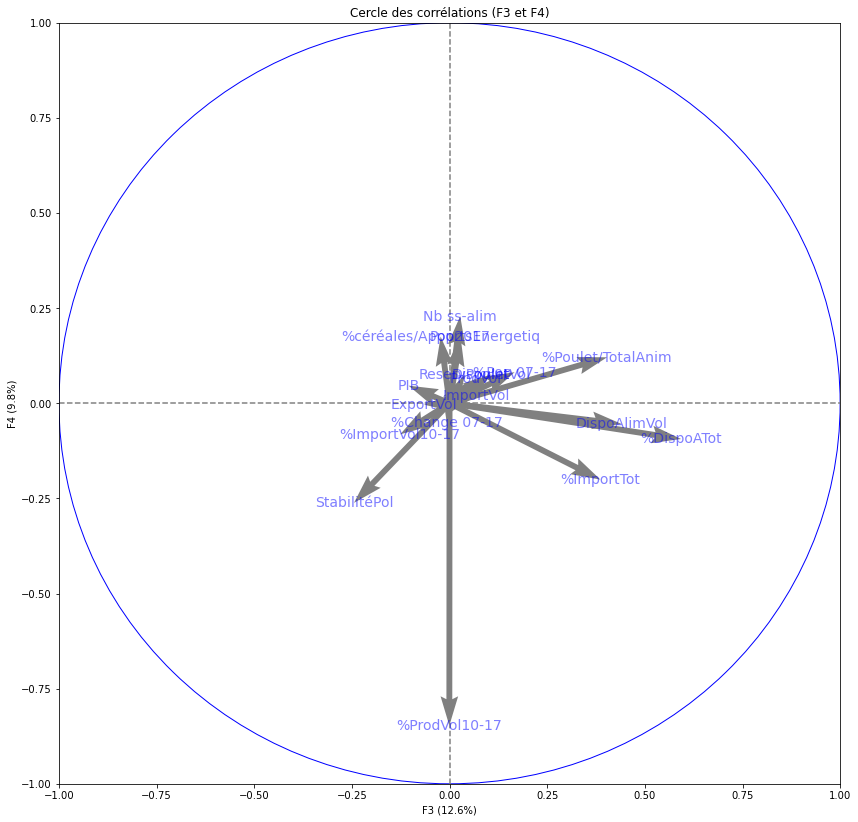

In [197]:
# Eboulis des valeurs propres
display_scree_plot(pca1)

# Cercle des corrélations
pcs1 = pca1.components_
display_circles(pcs1, n_comp1, pca1, [(0,1),(2,3)], labels = np.array(features1))


plt.show()

Synthétisons :

F1 : + Développement -  
F2 : - Effort d'autosuffisance +  
F3 : **- Spécialisation sur la volaille +**  
F4 : + Dynamique de production de volaille -  

Si l'on remarque une influence des outliers sur l'ACP, cela ne modifie qu'à la marge l'analyse des composantes F1 à F4.

## 6.3 Clustering par k-means

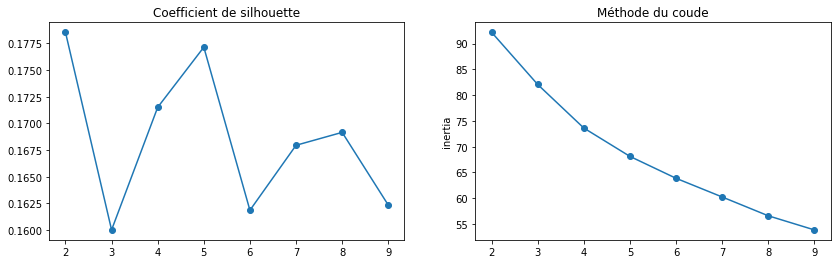

In [198]:
silhouettes2 = []
inertia2 = []

for num_clusters in range(2, 10) : 
    cls2 = cluster.KMeans(n_clusters=num_clusters,
                         n_init=100, init='random')
    cls2.fit(X_scaled1)
    silh2 = metrics.silhouette_score(X_scaled1,cls2.labels_)
    silhouettes2.append(silh2)
    inertia2.append(cls2.inertia_)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))     

ax1.plot(range(2, 10), silhouettes2, marker='o')
ax1.set_title('Coefficient de silhouette')

ax2.plot(range(2,10), inertia2, marker='o')
ax2.set_title('Méthode du coude')
ax2.set_ylabel('inertia')

plt.show()


Pas de grand changement au niveau du score silhouette (environ 0.17) ni de la forme de la courbe d'inertie. Pas d'impact sur l'étanchéité des clusters.

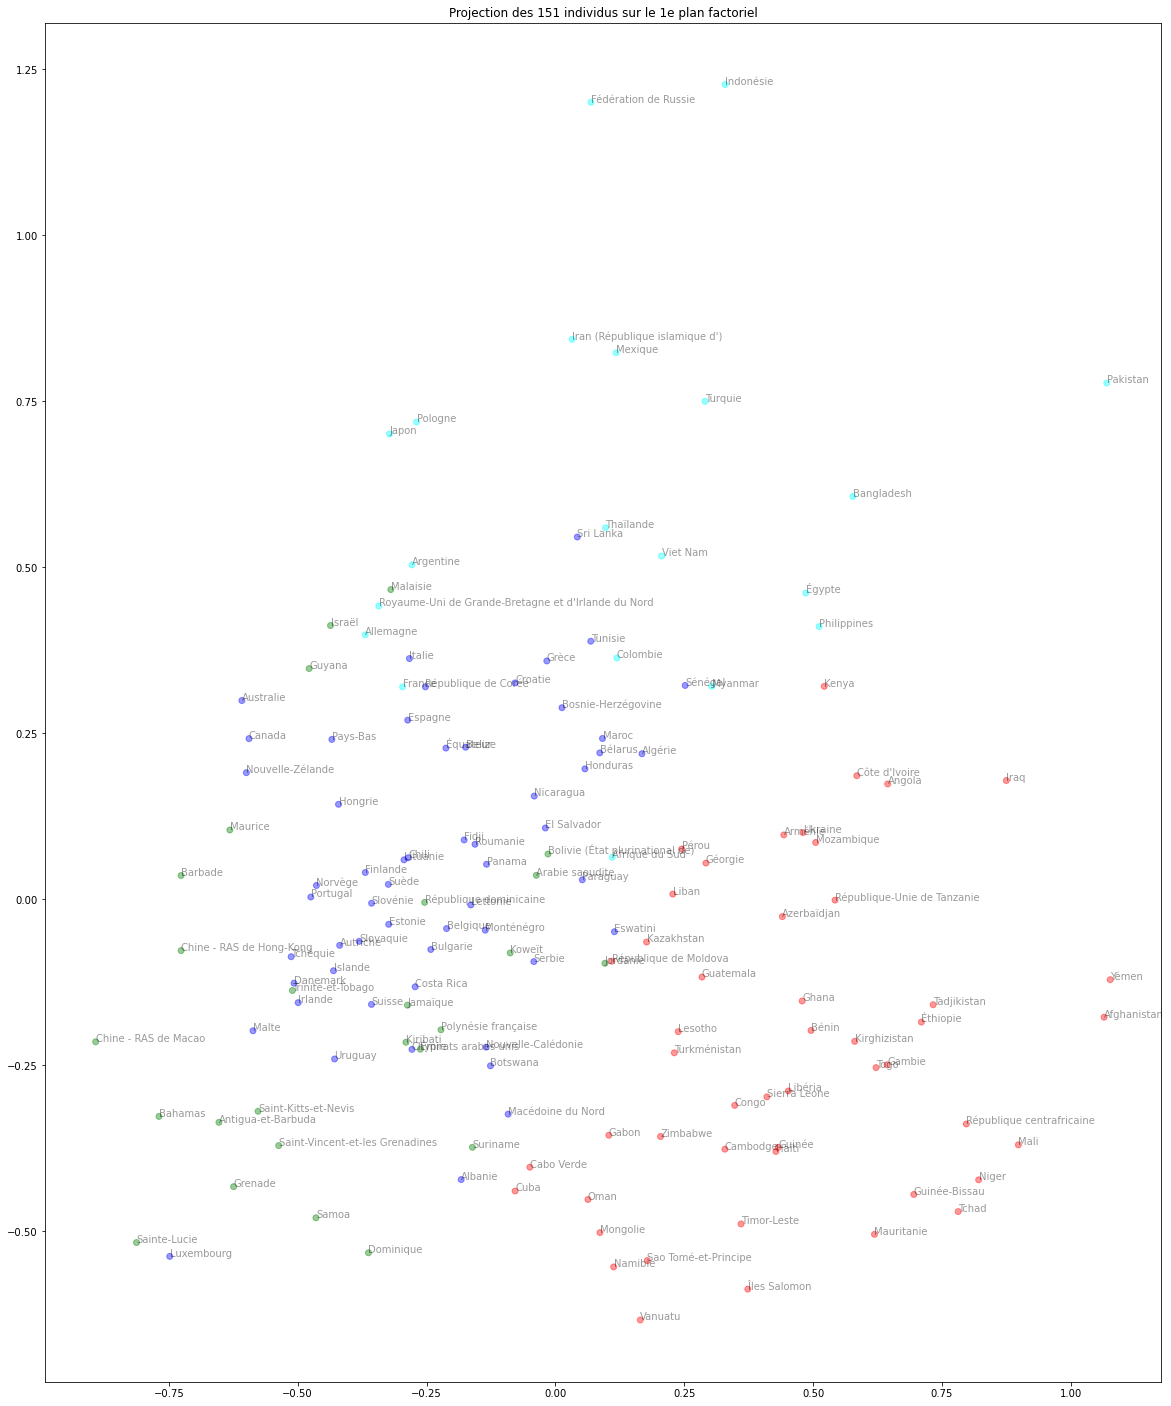

In [200]:
# Nombre de clusters souhaités
n_clust1 = 4

# Clustering par K-means
km3 = KMeans(n_clusters=n_clust1, init = 'k-means++',n_init = 100)
km3.fit(X_scaled1)

# Récupération des clusters attribués à chaque individu
clusters3 = km3.labels_

# Attribution des couleurs
colors3 =['red','green','blue','cyan']
centroidColor3= []
for item in range(n_clust1):
    centroidColor3.append(colors3[item])

dataPointColor3=[]
for row in clusters3:
    dataPointColor3.append(colors3[row])

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected1 = pca1.transform(X_scaled1)

plt.figure(figsize=(20,25))
plt.scatter(X_projected1[:, 0], X_projected1[:, 1], c=dataPointColor3, alpha=0.4)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected1.shape[0]))

for i in range(len(X_projected1)):
            plt.text(X_projected1[i, 0], X_projected1[i, 1], names1[i], alpha= 0.4)

plt.show(block=False)

In [201]:
volaille_zoom1 = volaille_zoom.copy()
volaille_zoom1['cluster'] = clusters3

In [202]:
for c3 in range(n_clust1):
    cluster_members3=volaille_zoom1[volaille_zoom1['cluster'] == c3][:]
    print('Cluster{}(n={}):'.format(c3, len(cluster_members3)))
    print(cluster_members3.index)
    print('-'* 17)

Cluster0(n=49):
Index(['Afghanistan', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Congo', 'Cuba', 'Côte d'Ivoire', 'Gabon',
       'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie',
       'Haïti', 'Iraq', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho',
       'Liban', 'Libéria', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique',
       'Namibie', 'Niger', 'Oman', 'Pérou', 'République centrafricaine',
       'République de Moldova', 'République-Unie de Tanzanie',
       'Sao Tomé-et-Principe', 'Sierra Leone', 'Tadjikistan', 'Tchad',
       'Timor-Leste', 'Togo', 'Turkménistan', 'Ukraine', 'Vanuatu', 'Yémen',
       'Zimbabwe', 'Éthiopie', 'Îles Salomon'],
      dtype='object', name='Zone')
-----------------
Cluster1(n=26):
Index(['Antigua-et-Barbuda', 'Arabie saoudite', 'Bahamas', 'Barbade',
       'Bolivie (État plurinational de)', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Dominique', 'Grenade', 'Guyana', 'Israël',

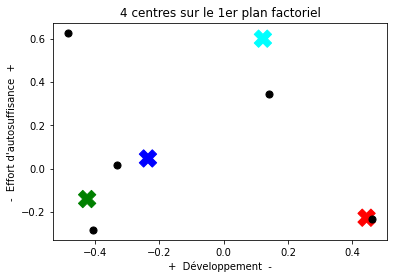

In [203]:
# Position des centres de classes
centroids3 = km3.cluster_centers_
centroids_projected3 = pca1.transform(centroids3)

# Projection

plt.scatter(centroids_projected3[:,0],centroids_projected3[:,1],s=300,c=centroidColor3,marker="X")
plt.title("{} centres sur le 1er plan factoriel".format(len(centroids3)))
plt.xlabel('+  Développement  -')
plt.ylabel('-  Effort d\'autosuffisance  +')
plt.scatter(centroids_projected[:,0],centroids_projected[:,1],s=50,c='black',marker="o")

plt.show()

Quelques différences sur le positionnement des centroïdes des 4 clusters (sur le 1er plan factoriel). Par exemple, les pays du cluster 'cyan' contribuent de manière plus importante à la composante 'effort d'autosuffisance'.

In [204]:
volaillezoom_scale = pd.DataFrame(data=X_scaled1, index=names1, columns=features1)

In [205]:
volaillezoom_scale['cluster'] = clusters3

In [206]:
zoom_mean = volaillezoom_scale.groupby(['cluster']).mean()

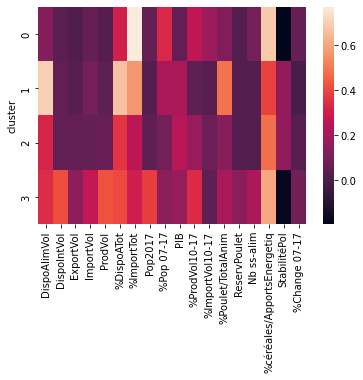

In [207]:
sns.heatmap(zoom_mean)
plt.show()

On retrouve la typologie des clusters :  
- Cluster n°0 : Carence en viande, instabilité économique et politique, Importations centrées sur la volaille  
- Cluster n°3 : Instabilité politique (forte diversité), pays plus peuplés, dynamique et capacité de production supérieure
- Cluster n°1 : Forte disponibilité alimentaire en volaille générée par la capacité de production et/ou les importations
- Cluster n°2 : En moyenne plus stable politiquement et économiquement, disponibilité et échanges extérieurs non centrées sur la volaille

Globalement, un rattachement aux clusters qui subit quelques modifications. Dans le cadre d'une étude de marché, il est possible de découper un plus grand nombre de clusters et/ou de consulter les données de chaque pays individuellement afin d'approfondir l'analyse.

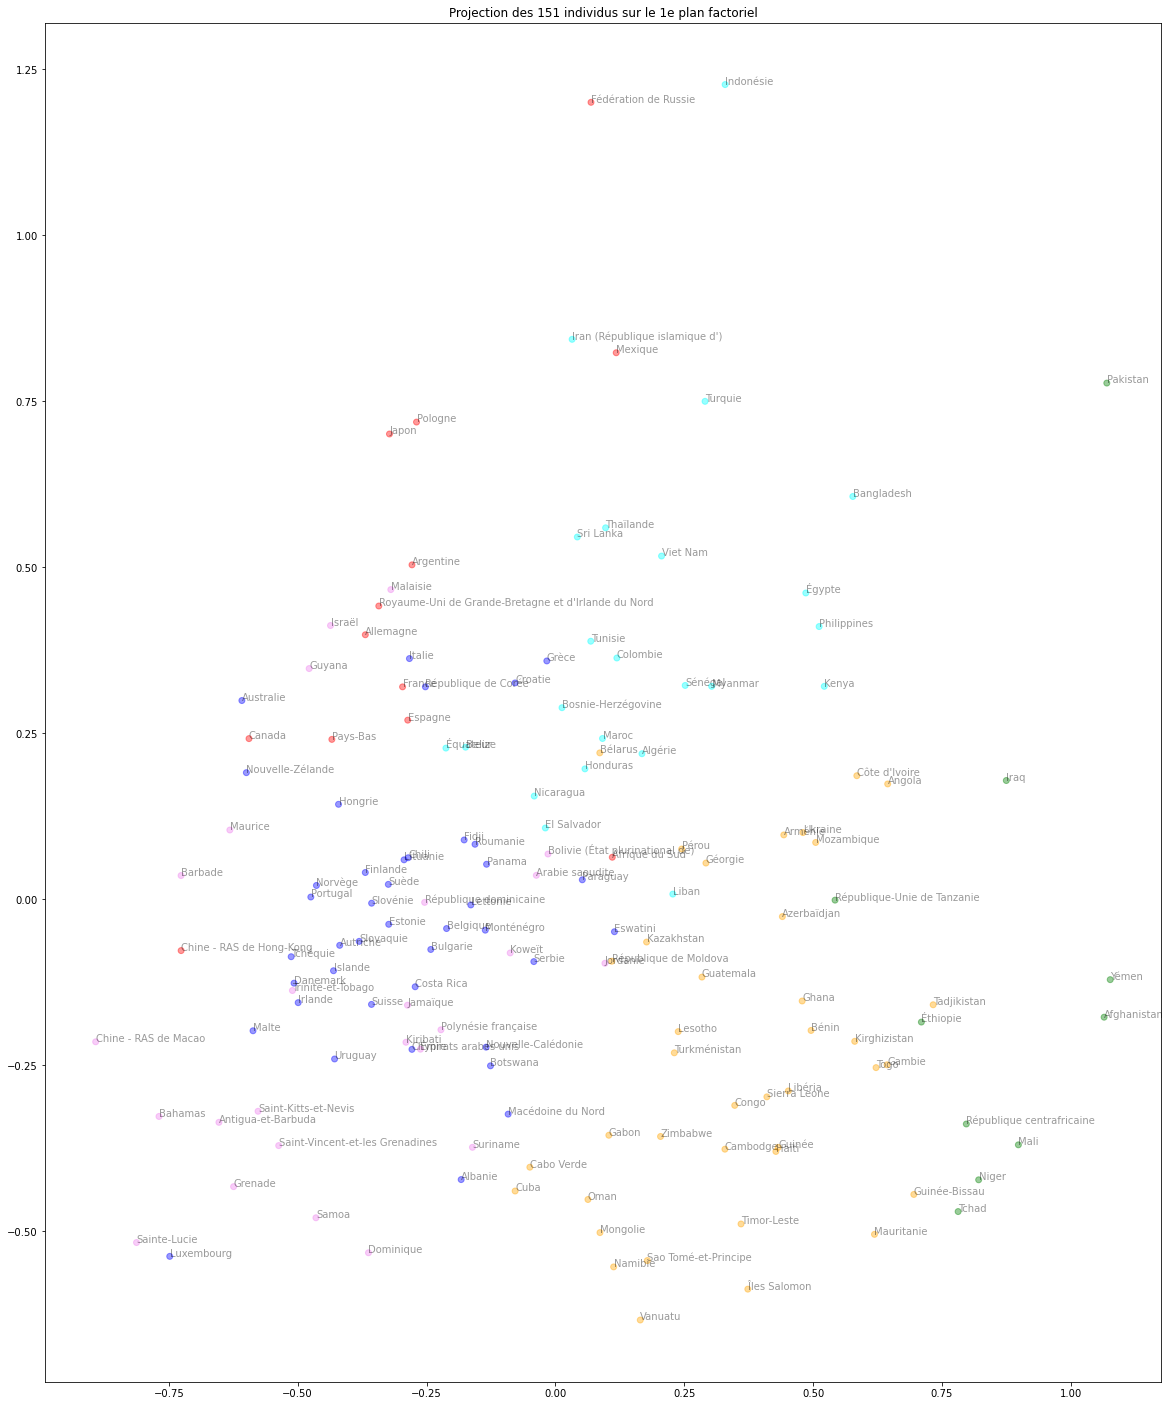

In [208]:
# Nombre de clusters souhaités
n_clust2 = 6

# Clustering par K-means
km4 = KMeans(n_clusters=n_clust2, init = 'k-means++',n_init = 100)
km4.fit(X_scaled1)

# Récupération des clusters attribués à chaque individu
clusters4 = km4.labels_

# Attribution des couleurs
colors4 =['red','green','blue','cyan','orange','violet']
centroidColor4= []
for item in range(n_clust2):
    centroidColor4.append(colors4[item])

dataPointColor4=[]
for row in clusters4:
    dataPointColor4.append(colors4[row])

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected1 = pca1.transform(X_scaled1)

plt.figure(figsize=(20,25))
plt.scatter(X_projected1[:, 0], X_projected1[:, 1], c=dataPointColor4, alpha=0.4)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected1.shape[0]))

for i in range(len(X_projected1)):
            plt.text(X_projected1[i, 0], X_projected1[i, 1], names1[i], alpha= 0.4)

plt.show(block=False)

In [209]:
volaillezoom_scale['cluster6'] = clusters4
volaillezoom6 = volaillezoom_scale.drop(columns=['cluster'])

In [210]:
zoom_mean6 = volaillezoom6.groupby(['cluster6']).mean()

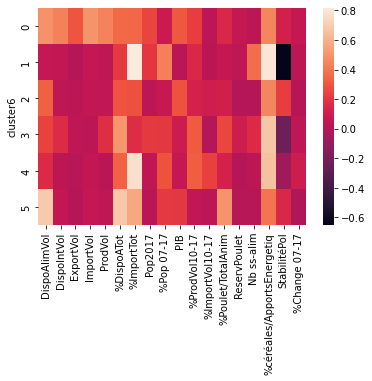

In [211]:
sns.heatmap(zoom_mean6)
plt.show()